In [1]:
import pandas as pd
import sqlite3

df = pd.read_csv('catheter_shipments.csv', encoding = 'latin-1')
df.head()


C:\Users\mark.hanson\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,item,date,org_number,order_type,qty,unit_price,order_number,revenue,customer_name,customer_number,...,item_desc,product_group,product_sub_type,product_class,product_line,abc_classification,order_type_desc,payment_terms,price_list,shipping_method
0,1104B,4/2/2018,107,NEURO US FF SUPPLY (MID),1,684.5,1533963743,684.50,NORTH OAKS HEALTH SYSTEM,67067,...,OLM INTRACRANIAL PRESSURE MONITORING KIT,Neurocritical Care,Catheter,Brain,ICP Disposables,A,NEURO US FF SUPPLY (MID),30 NET,NNI_SLS_USD,000001_FEDEX_T_GND
1,1104B,4/2/2018,107,NEURO US FF SUPPLY (MID),1,684.5,1533995854,684.50,NORTON HEALTHCARE,25131,...,OLM INTRACRANIAL PRESSURE MONITORING KIT,Neurocritical Care,Catheter,Brain,ICP Disposables,A,NEURO US FF SUPPLY (MID),30 NET,NNI_SLS_USD,000001_UPS_A_GND
2,1104B,4/2/2018,107,NEURO US FF SUPPLY (MID),1,821.34,1534019381,821.34,PARKER ADVENTIST HOSPITAL,67353,...,OLM INTRACRANIAL PRESSURE MONITORING KIT,Neurocritical Care,Catheter,Brain,ICP Disposables,A,NEURO US FF SUPPLY (MID),NET 30,NNI_SLS_USD,000001_FEDEX_T_GND
3,1104B,4/2/2018,107,NEURO US FF SUPPLY (MID),1,963.3,1534036124,963.30,BAPTIST HEALTH MEDICAL CENTER - ARKADELPHIA,112608,...,OLM INTRACRANIAL PRESSURE MONITORING KIT,Neurocritical Care,Catheter,Brain,ICP Disposables,A,NEURO US FF SUPPLY (MID),30 NET,NNI_SLS_USD,000001_FEDEX_T_GND
4,1104B,4/3/2018,107,NEURO CAD FF SUPPLY (OAK),1,568.49,1534120029,568.49,HOP DE CHICOUTIMI,81750,...,OLM INTRACRANIAL PRESSURE MONITORING KIT,Neurocritical Care,Catheter,Brain,ICP Disposables,A,NEURO CAD FF SUPPLY (OAK),NET 30,NNI_SLS_CAD,000001_UPS_A_GND


In [2]:
df.describe()

,org_number,order_number,revenue,customer_number,actual_first_shipped_year,year,account_number
count,300357.000000,3.003570e+05,300357.000000,3.003570e+05,300357.000000,300357.000000,3.003570e+05
mean,122.555839,1.732255e+09,1048.064432,1.828426e+05,2020.405368,2020.380990,4.681469e+04
std,36.028436,1.159005e+08,3796.567306,2.101707e+05,1.659296,1.656036,1.317000e+06
min,107.000000,1.519545e+09,0.000000,2.084000e+03,2018.000000,2018.000000,1.022000e+03
25%,107.000000,1.613906e+09,255.190000,5.681500e+04,2019.000000,2019.000000,1.268500e+04
50%,107.000000,1.748226e+09,510.380000,1.139950e+05,2020.000000,2020.000000,2.514200e+04
75%,107.000000,1.831547e+09,1018.350000,2.306150e+05,2022.000000,2022.000000,3.628100e+04
max,206.000000,1.905834e+09,425106.000000,1.364467e+06,2023.000000,2023.000000,1.113564e+08


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300357 entries, 0 to 300356
Data columns (total 42 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   item                          300357 non-null  object 
 1   date                          300357 non-null  object 
 2   org_number                    300357 non-null  int64  
 3   order_type                    300357 non-null  object 
 4   qty                           300357 non-null  object 
 5   unit_price                    300357 non-null  object 
 6   order_number                  300357 non-null  int64  
 7   revenue                       300357 non-null  float64
 8   customer_name                 300357 non-null  object 
 9   customer_number               300357 non-null  int64  
 10  city                          300357 non-null  object 
 11  state                         245389 non-null  object 
 12  country                       300357 non-nul

In [4]:
df.shape

(300357, 42)

In [5]:
df.columns

Index(['item', 'date', 'org_number', 'order_type', 'qty', 'unit_price',
       'order_number', 'revenue', 'customer_name', 'customer_number', 'city',
       'state', 'country', 'postal_zode', 'province',
       'actual_first_shipped_year', 'actual_first_shipped_quarter',
       'actual_first_shipped_month', 'actual_first_shipped_week',
       'actual_first_shipped_date', 'week', 'month', 'quarter', 'year',
       'day_name', 'customer_type', 'customer_type_name', 'customer_category',
       'street_address', 'customer_account_name', 'account_number',
       'siebel_account_type', 'item_desc', 'product_group', 'product_sub_type',
       'product_class', 'product_line', 'abc_classification',
       'order_type_desc', 'payment_terms', 'price_list', 'shipping_method'],
      dtype='object')

In [6]:
df.isnull().sum()

item                                 0
date                                 0
org_number                           0
order_type                           0
qty                                  0
unit_price                           0
order_number                         0
revenue                              0
customer_name                        0
customer_number                      0
city                                 0
state                            54968
country                              0
postal_zode                         41
province                        294302
actual_first_shipped_year            0
actual_first_shipped_quarter         0
actual_first_shipped_month           0
actual_first_shipped_week            0
actual_first_shipped_date            0
week                                 0
month                                0
quarter                              0
year                                 0
day_name                             0
customer_type            

In [7]:
df.dtypes

item                             object
date                             object
org_number                        int64
order_type                       object
qty                              object
unit_price                       object
order_number                      int64
revenue                         float64
customer_name                    object
customer_number                   int64
city                             object
state                            object
country                          object
postal_zode                      object
province                         object
actual_first_shipped_year         int64
actual_first_shipped_quarter     object
actual_first_shipped_month       object
actual_first_shipped_week        object
actual_first_shipped_date        object
week                             object
month                            object
quarter                          object
year                              int64
day_name                         object


In [8]:
df['item'].unique()

array(['1104B', '1104BT', '1104G', '1104HM', '1104HMT', '1104L', '11811',
       '11812', '14085', '161057', '25V26', '25V30', '37V26', '5032-TP',
       '50V26', '6030-3-TP', '6030-TP', '6032-TP', '75V23', '821705',
       '821706', '821707', '821730', '821730C', '821731', '821731C',
       '821732C', '821733', '821735', '821738C', '821739', '901112',
       '901118', '901122', '901124', '901125', '901142', '901143',
       '901145', '901162', '901163', '901165', '901182', '901183',
       '901212', '901218', '901224', '9013C0232', '9013L0203',
       '9013L0453', '9013S0012', '9013S0022', '9013S0032', '9013S0042',
       '9013S0052', '9013S0182', '9013S0225', '9013S0422', '9013S0432',
       '9013S0442', '9013S0452', '9013S0462', '9013S0472', '901410',
       '901411', '901412', '901414', '901415', '902-DMF25-S',
       '902-DMF25-TP', '902-DMF37-S', '902-DMF37-TP', '902-DMG25-S',
       '902-DMG25-TP', '902-DMG37-S', '902-DMG37-TP', '902-DMG50-S',
       '902-DMG50-TP', '902-DMG75-S

In [9]:
df['customer_account_name'].unique()

array(['NORTH OAKS HEALTH SYSTEM', 'NORTON HEALTHCARE',
       'PARKER ADVENTIST HOSPITAL', ..., 'NEUROZENTRUM STARNBERG',
       'COLORADO NEUROLOGY CENTER', 'ALLERGAN PHARMACEUTICALS IRELAND'],
      dtype=object)

In [10]:
df.nunique()

item                               483
date                              1908
org_number                           2
order_type                          57
qty                                291
unit_price                       16493
order_number                    217095
revenue                          36811
customer_name                     8074
customer_number                   8146
city                              3786
state                               70
country                            111
postal_zode                       5927
province                            60
actual_first_shipped_year            6
actual_first_shipped_quarter        24
actual_first_shipped_month          71
actual_first_shipped_week          308
actual_first_shipped_date         1662
week                               305
month                               70
quarter                             24
year                                 6
day_name                             7
customer_type            

In [11]:
df.corr()

,org_number,order_number,revenue,customer_number,actual_first_shipped_year,year,account_number
org_number,1.000000,-0.014469,0.023766,0.310908,-0.015737,-0.013390,0.001659
order_number,-0.014469,1.000000,0.011309,0.055972,0.970137,0.972440,-0.007099
revenue,0.023766,0.011309,1.000000,0.031083,0.012523,0.009134,0.000003
customer_number,0.310908,0.055972,0.031083,1.000000,0.058510,0.055967,0.024269
actual_first_shipped_year,-0.015737,0.970137,0.012523,0.058510,1.000000,0.994762,-0.005606
year,-0.013390,0.972440,0.009134,0.055967,0.994762,1.000000,-0.005481
account_number,0.001659,-0.007099,0.000003,0.024269,-0.005606,-0.005481,1.000000


In [12]:
grouped_item = df.groupby('item')

print(grouped_item)

In [13]:
grouped_account = df.groupby('customer_account_name')

print(grouped_account)

In [14]:
pivot = df.pivot_table(index='customer_account_name', columns='item', values='revenue')

print(pivot)

item                                                1104B  1104BT  1104G  \
customer_account_name                                                      
*CHU SAINTE-JUSTINE                                   NaN     NaN    NaN   
*CISSS CHAUDIERE-APPALACHES-LÉVIS (BOUL WILFRID...    NaN     NaN    NaN   
*CISSS DE LA GASPÉSIE  - MARIA                        NaN     NaN    NaN   
*CISSS DE LANAUDIERE - CHDL                           NaN     NaN    NaN   
*CIUSSS CENTRE-OUEST-DE-L'ILE-MTL-MONTREAL            NaN     NaN    NaN   
...                                                   ...     ...    ...   
ZIZAWA CO.,LTD                                        NaN     NaN    NaN   
ZNS SÜDPFALZ                                          NaN     NaN    NaN   
ZOFIA MROCZKA, MD                                     NaN     NaN    NaN   
ZOLS S.R.O.                                           NaN     NaN    NaN   
ÖKUMENISCHES HAINICH KLINIKUM GGMBH                   NaN     NaN    NaN   

item       

In [15]:
import pandas as pd
import sqlite3

# Read the CSV file into a pandas DataFrame
df = pd.read_csv('catheter_shipments.csv', encoding='latin-1')

# Establish a connection to the SQLite database
conn = sqlite3.connect('df_table.db')

# Convert the DataFrame to a SQLite table
df.to_sql('df_table', conn, index=False, if_exists='replace')

# Define SQL query
query = '''
    SELECT customer_account_name, quarter, SUM(revenue) AS total_revenue
    FROM df_table
    GROUP BY customer_account_name, quarter
    ORDER BY quarter, total_revenue DESC
'''

# Execute the query using pandas
df_result = pd.read_sql_query(query, conn)

# Get top 5 account names by revenue per quarter
top_accounts = df_result.groupby('quarter').head(5)

# Display the top 5 account names by revenue per quarter
print(top_accounts)

# Close the connection
conn.close()


C:\Users\mark.hanson\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


                                   customer_account_name   quarter  \
0                                    MVAP MEDICAL SUPPLY  2018 Q 1   
1                       ALLERGAN PHARMACEUTICALS IRELAND  2018 Q 1   
2                                      DUOMED BELGIUM NV  2018 Q 1   
3           PHYSIOTEC MEDICAL EQUIPMENT (HONG KONG) LTD.  2018 Q 1   
4                                          ABBVIE US LLC  2018 Q 1   
...                                                  ...       ...   
65716                                MVAP MEDICAL SUPPLY  2023 Q 3   
65717                                       ALMEVAN S.L.  2023 Q 3   
65718                                  DUOMED BELGIUM NV  2023 Q 3   
65719       PHYSIOTEC MEDICAL EQUIPMENT (HONG KONG) LTD.  2023 Q 3   
68441  KAISER PERMANENTE SOUTH SACRAMENTO MEDICAL CENTER  2023 Q 4   

       total_revenue  
0          508084.96  
1          221570.96  
2          188983.48  
3          171410.45  
4          146475.00  
...              ... 

In [16]:
import pandas as pd
import sqlite3

# Read the CSV file into a pandas DataFrame
df = pd.read_csv('catheter_shipments.csv', encoding='latin-1')

# Establish a connection to the SQLite database
conn = sqlite3.connect('df_table.db')

# Convert the DataFrame to a SQLite table
df.to_sql('df_table', conn, index=False, if_exists='replace')

# Define SQL query to get the top 5 accounts for each quarter
query = '''
    SELECT customer_account_name, quarter, SUM(revenue) AS total_revenue
    FROM df_table
    GROUP BY customer_account_name, quarter
    ORDER BY quarter, total_revenue DESC
'''

# Execute the query using pandas' read_sql_query() function
df_result = pd.read_sql_query(query, conn)

# Get top 5 accounts by revenue for each quarter
top_accounts_by_quarter = df_result.groupby('quarter').apply(lambda x: x.nlargest(5, 'total_revenue')).reset_index(drop=True)

# Display the top 5 accounts by revenue for each quarter
print(top_accounts_by_quarter)

# Close the connection
conn.close()


C:\Users\mark.hanson\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


                                 customer_account_name   quarter  \
0                                  MVAP MEDICAL SUPPLY  2018 Q 1   
1                     ALLERGAN PHARMACEUTICALS IRELAND  2018 Q 1   
2                                    DUOMED BELGIUM NV  2018 Q 1   
3         PHYSIOTEC MEDICAL EQUIPMENT (HONG KONG) LTD.  2018 Q 1   
4                                        ABBVIE US LLC  2018 Q 1   
..                                                 ...       ...   
111                                MVAP MEDICAL SUPPLY  2023 Q 3   
112                                       ALMEVAN S.L.  2023 Q 3   
113                                  DUOMED BELGIUM NV  2023 Q 3   
114       PHYSIOTEC MEDICAL EQUIPMENT (HONG KONG) LTD.  2023 Q 3   
115  KAISER PERMANENTE SOUTH SACRAMENTO MEDICAL CENTER  2023 Q 4   

     total_revenue  
0        508084.96  
1        221570.96  
2        188983.48  
3        171410.45  
4        146475.00  
..             ...  
111      271820.61  
112      197415

In [17]:
import pandas as pd

counts = df['item'].value_counts()
print(counts)


S53153       24766
S53156       21421
1104B        11989
9013S0012    11222
S53158       10527
             ...  
908112           1
999111           1
901182           1
999112           1
902045           1
Name: item, Length: 483, dtype: int64


In [18]:
import pandas as pd

counts = df.groupby('item').size()
print(counts)


item
1104B      11989
1104BT      3005
1104G       2890
1104HM      3376
1104HMT     1176
           ...  
S53156     21421
S53158     10527
S53159      2517
VC1           34
VTUN         614
Length: 483, dtype: int64


In [19]:
import pandas as pd

pd.set_option('display.max_rows', None)
counts = df['item'].value_counts()
print(counts)


S53153          24766
S53156          21421
1104B           11989
9013S0012       11222
S53158          10527
9013S0032        9574
NT821731C        7050
MJT-3726-LL      6994
MJT-3727-LL      5991
902-DMF37-TP     5049
9013S0042        4889
F-E5GH-48        4842
902-DMF37-S      4577
NT901124         4558
NT821732C        4532
MJT-5025-LL      4351
5032-TP          4342
MJT-2530-LL      4190
821731C          3951
901124           3893
6030-TP          3728
9013L0453        3428
1104HM           3376
902-DMG37-TP     3328
1104BT           3005
1104G            2890
9013C0232        2720
9013S0442        2591
902-DMG50-TP     2566
F-E5GH-60        2554
S53159           2517
NT821707         2450
902-DMF25-TP     2287
821732C          2259
9013S0452        2194
NT901118         2156
F-E5GH-72        2068
NT821733         2007
NT821730C        1979
NT9MD170         1928
901118           1919
902-DMG37-S      1881
821707           1877
902-DMG50-S      1799
1104L            1710
902-DMF25-

In [20]:
# Get the value counts for each part
counts = df['item'].value_counts()

# Sort the value counts in descending order and print the top 10 parts by quantity
top_parts_by_quantity = counts.head(10)
print(top_parts_by_quantity)


S53153          24766
S53156          21421
1104B           11989
9013S0012       11222
S53158          10527
9013S0032        9574
NT821731C        7050
MJT-3726-LL      6994
MJT-3727-LL      5991
902-DMF37-TP     5049
Name: item, dtype: int64


In [21]:
# Convert the 'qty' column to numeric
df['qty'] = pd.to_numeric(df['qty'], errors='coerce')

# Calculate total quantity shipped for each part
part_quantity = df.groupby('item')['qty'].sum()
pd.options.display.float_format = '{:.0f}'.format

# Sort the total quantity in descending order and print the top 10 parts by quantity shipped
top_parts_by_quantity = part_quantity.sort_values(ascending=False).head(10)
print(top_parts_by_quantity)


item
S53153        165749
S53156        153845
9013S0012      72419
9013S0032      70968
1104B          55429
S53158         48981
9013L0453      38887
F-E5GH-48      38279
902-DMF37-S    32443
1104G          29412
Name: qty, dtype: float64


In [22]:
import pandas as pd

pd.set_option('display.max_rows', None)
counts = df.groupby('item').size()
print(counts)


item
1104B           11989
1104BT           3005
1104G            2890
1104HM           3376
1104HMT          1176
1104L            1710
11811               6
11812              12
14085               5
161057            216
25V26             280
25V30            1003
37V26            1292
5032-TP          4342
50V26             827
6030-3-TP        1460
6030-TP          3728
6032-TP          1355
75V23             153
821705            964
821706           1373
821707           1877
821730            464
821730C          1249
821731            984
821731C          3951
821732C          2259
821733           1029
821735            700
821738C            82
821739            264
901112             12
901113              4
901118           1919
901122             20
901123              7
901124           3893
901125             27
901142             19
901143             13
901145             38
901162             17
901163              5
901165             31
901182              1
90118

In [23]:
# Calculate total revenue for each part
part_revenue = df.groupby('item')['revenue'].sum().reset_index()

# Set display options to show full float values
pd.options.display.float_format = '{:.2f}'.format

# Sort by revenue in descending order and get the top 10 parts
top_parts_by_revenue = part_revenue.sort_values(by = 'revenue', ascending = False).head(10)

# Reset index and add a new column for row numbers starting from 1
top_parts_by_revenue.reset_index(drop=True, inplace=True)
top_parts_by_revenue.index += 1

print(top_parts_by_revenue)


         item     revenue
1       1104B 30307720.18
2      S53153 29123694.20
3      S53156 24928418.84
4       CAM02 16638455.37
5       1104G 13036986.02
6      1104BT 10739374.34
7   9013S0032 10692991.48
8      S53158  9089148.12
9   9013S0012  8144970.18
10     1104HM  7985086.75


In [24]:
part_name = '1104B'

# Calculate the total revenue
total_revenue = df['revenue'].sum()

# Filter the DataFrame for the specific part
part_revenue = df[df['item'] == part_name]['revenue'].sum()

# Calculate the percentage of revenue for the specific part against the total revenue
percentage = (part_revenue / total_revenue) * 100

print(f"The percentage of revenue for '{part_name}' against the total revenue is: {percentage:.2f}%")


The percentage of revenue for '1104B' against the total revenue is: 9.63%


In [25]:
part_name = '1104B'

# Group by year and calculate the total revenue for each year
revenue_by_year = df.groupby('year')['revenue'].sum()

# Calculate the total revenue across all years
total_revenue = df['revenue'].sum()

# Create an empty dictionary to store percentages for each year
part_percentage_by_year = {}

# Loop through each year to calculate percentage of revenue for the specific part
for year, group in df.groupby('year'):
    part_revenue = group[group['item'] == part_name]['revenue'].sum()
    percentage = (part_revenue / revenue_by_year[year]) * 100 if year in revenue_by_year else 0
    part_percentage_by_year[year] = percentage

# Create a DataFrame with percentages by year
part_percentage_df = pd.DataFrame(list(part_percentage_by_year.items()), columns=['Year', 'Percentage'])
part_percentage_df = part_percentage_df.sort_values(by='Year')

print(part_percentage_df)


   Year  Percentage
0  2018        8.32
1  2019        9.66
2  2020       10.93
3  2021       11.07
4  2022        8.89
5  2023        8.53


In [26]:
part_name = 'S53153'

# Calculate the total revenue
total_revenue = df['revenue'].sum()

# Filter the DataFrame for the specific part
part_revenue = df[df['item'] == part_name]['revenue'].sum()

# Calculate the percentage of revenue for the specific part against the total revenue
percentage = (part_revenue / total_revenue) * 100

print(f"The percentage of revenue for '{part_name}' against the total revenue is: {percentage:.2f}%")


The percentage of revenue for 'S53153' against the total revenue is: 9.25%


In [27]:
part_name = 'S53153'

# Group by year and calculate the total revenue for each year
revenue_by_year = df.groupby('year')['revenue'].sum()

# Calculate the total revenue across all years
total_revenue = df['revenue'].sum()

# Create an empty dictionary to store percentages for each year
part_percentage_by_year = {}

# Loop through each year to calculate percentage of revenue for the specific part
for year, group in df.groupby('year'):
    part_revenue = group[group['item'] == part_name]['revenue'].sum()
    percentage = (part_revenue / revenue_by_year[year]) * 100 if year in revenue_by_year else 0
    part_percentage_by_year[year] = percentage

# Create a DataFrame with percentages by year
part_percentage_df = pd.DataFrame(list(part_percentage_by_year.items()), columns=['Year', 'Percentage'])
part_percentage_df = part_percentage_df.sort_values(by='Year')

print(part_percentage_df)


   Year  Percentage
0  2018        9.57
1  2019        8.75
2  2020        8.68
3  2021        9.50
4  2022        9.46
5  2023        9.65


In [28]:
part_name = 'S53156'

# Calculate the total revenue
total_revenue = df['revenue'].sum()

# Filter the DataFrame for the specific part
part_revenue = df[df['item'] == part_name]['revenue'].sum()

# Calculate the percentage of revenue for the specific part against the total revenue
percentage = (part_revenue / total_revenue) * 100

print(f"The percentage of revenue for '{part_name}' against the total revenue is: {percentage:.2f}%")


The percentage of revenue for 'S53156' against the total revenue is: 7.92%


In [29]:
part_name = 'S53156'

# Group by year and calculate the total revenue for each year
revenue_by_year = df.groupby('year')['revenue'].sum()

# Calculate the total revenue across all years
total_revenue = df['revenue'].sum()

# Create an empty dictionary to store percentages for each year
part_percentage_by_year = {}

# Loop through each year to calculate percentage of revenue for the specific part
for year, group in df.groupby('year'):
    part_revenue = group[group['item'] == part_name]['revenue'].sum()
    percentage = (part_revenue / revenue_by_year[year]) * 100 if year in revenue_by_year else 0
    part_percentage_by_year[year] = percentage

# Create a DataFrame with percentages by year
part_percentage_df = pd.DataFrame(list(part_percentage_by_year.items()), columns=['Year', 'Percentage'])
part_percentage_df = part_percentage_df.sort_values(by='Year')

print(part_percentage_df)


   Year  Percentage
0  2018        8.66
1  2019        7.71
2  2020        7.46
3  2021        7.88
4  2022        8.07
5  2023        7.72


In [30]:
part_name = 'CAM02'

# Calculate the total revenue
total_revenue = df['revenue'].sum()

# Filter the DataFrame for the specific part
part_revenue = df[df['item'] == part_name]['revenue'].sum()

# Calculate the percentage of revenue for the specific part against the total revenue
percentage = (part_revenue / total_revenue) * 100

print(f"The percentage of revenue for '{part_name}' against the total revenue is: {percentage:.2f}%")


The percentage of revenue for 'CAM02' against the total revenue is: 5.29%


In [31]:
part_name = 'CAM02'

# Group by year and calculate the total revenue for each year
revenue_by_year = df.groupby('year')['revenue'].sum()

# Calculate the total revenue across all years
total_revenue = df['revenue'].sum()

# Create an empty dictionary to store percentages for each year
part_percentage_by_year = {}

# Loop through each year to calculate percentage of revenue for the specific part
for year, group in df.groupby('year'):
    part_revenue = group[group['item'] == part_name]['revenue'].sum()
    percentage = (part_revenue / revenue_by_year[year]) * 100 if year in revenue_by_year else 0
    part_percentage_by_year[year] = percentage

# Create a DataFrame with percentages by year
part_percentage_df = pd.DataFrame(list(part_percentage_by_year.items()), columns=['Year', 'Percentage'])
part_percentage_df = part_percentage_df.sort_values(by='Year')

print(part_percentage_df)


   Year  Percentage
0  2018        5.65
1  2019        5.89
2  2020        5.68
3  2021        4.50
4  2022        5.11
5  2023        4.85


In [32]:
part_name = '1104G'

# Calculate the total revenue
total_revenue = df['revenue'].sum()

# Filter the DataFrame for the specific part
part_revenue = df[df['item'] == part_name]['revenue'].sum()

# Calculate the percentage of revenue for the specific part against the total revenue
percentage = (part_revenue / total_revenue) * 100

print(f"The percentage of revenue for '{part_name}' against the total revenue is: {percentage:.2f}%")


The percentage of revenue for '1104G' against the total revenue is: 4.14%


In [33]:
part_name = '1104G'

# Group by year and calculate the total revenue for each year
revenue_by_year = df.groupby('year')['revenue'].sum()

# Calculate the total revenue across all years
total_revenue = df['revenue'].sum()

# Create an empty dictionary to store percentages for each year
part_percentage_by_year = {}

# Loop through each year to calculate percentage of revenue for the specific part
for year, group in df.groupby('year'):
    part_revenue = group[group['item'] == part_name]['revenue'].sum()
    percentage = (part_revenue / revenue_by_year[year]) * 100 if year in revenue_by_year else 0
    part_percentage_by_year[year] = percentage

# Create a DataFrame with percentages by year
part_percentage_df = pd.DataFrame(list(part_percentage_by_year.items()), columns=['Year', 'Percentage'])
part_percentage_df = part_percentage_df.sort_values(by='Year')

print(part_percentage_df)


   Year  Percentage
0  2018        3.87
1  2019        4.28
2  2020        3.87
3  2021        4.16
4  2022        4.53
5  2023        4.09


In [34]:
part_name = '1104BT'

# Calculate the total revenue
total_revenue = df['revenue'].sum()

# Filter the DataFrame for the specific part
part_revenue = df[df['item'] == part_name]['revenue'].sum()

# Calculate the percentage of revenue for the specific part against the total revenue
percentage = (part_revenue / total_revenue) * 100

print(f"The percentage of revenue for '{part_name}' against the total revenue is: {percentage:.2f}%")


The percentage of revenue for '1104BT' against the total revenue is: 3.41%


In [35]:
part_name = '1104BT'

# Group by year and calculate the total revenue for each year
revenue_by_year = df.groupby('year')['revenue'].sum()

# Calculate the total revenue across all years
total_revenue = df['revenue'].sum()

# Create an empty dictionary to store percentages for each year
part_percentage_by_year = {}

# Loop through each year to calculate percentage of revenue for the specific part
for year, group in df.groupby('year'):
    part_revenue = group[group['item'] == part_name]['revenue'].sum()
    percentage = (part_revenue / revenue_by_year[year]) * 100 if year in revenue_by_year else 0
    part_percentage_by_year[year] = percentage

# Create a DataFrame with percentages by year
part_percentage_df = pd.DataFrame(list(part_percentage_by_year.items()), columns=['Year', 'Percentage'])
part_percentage_df = part_percentage_df.sort_values(by='Year')

print(part_percentage_df)


   Year  Percentage
0  2018        2.83
1  2019        3.53
2  2020        4.61
3  2021        3.22
4  2022        3.49
5  2023        2.62


In [36]:
part_name = '9013S0032'

# Calculate the total revenue
total_revenue = df['revenue'].sum()

# Filter the DataFrame for the specific part
part_revenue = df[df['item'] == part_name]['revenue'].sum()

# Calculate the percentage of revenue for the specific part against the total revenue
percentage = (part_revenue / total_revenue) * 100

print(f"The percentage of revenue for '{part_name}' against the total revenue is: {percentage:.2f}%")


The percentage of revenue for '9013S0032' against the total revenue is: 3.40%


In [37]:
part_name = '9013S0032'

# Group by year and calculate the total revenue for each year
revenue_by_year = df.groupby('year')['revenue'].sum()

# Calculate the total revenue across all years
total_revenue = df['revenue'].sum()

# Create an empty dictionary to store percentages for each year
part_percentage_by_year = {}

# Loop through each year to calculate percentage of revenue for the specific part
for year, group in df.groupby('year'):
    part_revenue = group[group['item'] == part_name]['revenue'].sum()
    percentage = (part_revenue / revenue_by_year[year]) * 100 if year in revenue_by_year else 0
    part_percentage_by_year[year] = percentage

# Create a DataFrame with percentages by year
part_percentage_df = pd.DataFrame(list(part_percentage_by_year.items()), columns=['Year', 'Percentage'])
part_percentage_df = part_percentage_df.sort_values(by='Year')

print(part_percentage_df)


   Year  Percentage
0  2018        3.76
1  2019        2.85
2  2020        3.26
3  2021        3.56
4  2022        3.51
5  2023        3.52


In [38]:
part_name = 'S53158'

# Calculate the total revenue
total_revenue = df['revenue'].sum()

# Filter the DataFrame for the specific part
part_revenue = df[df['item'] == part_name]['revenue'].sum()

# Calculate the percentage of revenue for the specific part against the total revenue
percentage = (part_revenue / total_revenue) * 100

print(f"The percentage of revenue for '{part_name}' against the total revenue is: {percentage:.2f}%")


The percentage of revenue for 'S53158' against the total revenue is: 2.89%


In [39]:
part_name = 'S53158'

# Group by year and calculate the total revenue for each year
revenue_by_year = df.groupby('year')['revenue'].sum()

# Calculate the total revenue across all years
total_revenue = df['revenue'].sum()

# Create an empty dictionary to store percentages for each year
part_percentage_by_year = {}

# Loop through each year to calculate percentage of revenue for the specific part
for year, group in df.groupby('year'):
    part_revenue = group[group['item'] == part_name]['revenue'].sum()
    percentage = (part_revenue / revenue_by_year[year]) * 100 if year in revenue_by_year else 0
    part_percentage_by_year[year] = percentage

# Create a DataFrame with percentages by year
part_percentage_df = pd.DataFrame(list(part_percentage_by_year.items()), columns=['Year', 'Percentage'])
part_percentage_df = part_percentage_df.sort_values(by='Year')

print(part_percentage_df)


   Year  Percentage
0  2018        3.38
1  2019        2.73
2  2020        2.80
3  2021        2.79
4  2022        2.86
5  2023        2.80


In [40]:
part_name = '9013S0012'

# Calculate the total revenue
total_revenue = df['revenue'].sum()

# Filter the DataFrame for the specific part
part_revenue = df[df['item'] == part_name]['revenue'].sum()

# Calculate the percentage of revenue for the specific part against the total revenue
percentage = (part_revenue / total_revenue) * 100

print(f"The percentage of revenue for '{part_name}' against the total revenue is: {percentage:.2f}%")


The percentage of revenue for '9013S0012' against the total revenue is: 2.59%


In [41]:
part_name = '9013S0012'

# Group by year and calculate the total revenue for each year
revenue_by_year = df.groupby('year')['revenue'].sum()

# Calculate the total revenue across all years
total_revenue = df['revenue'].sum()

# Create an empty dictionary to store percentages for each year
part_percentage_by_year = {}

# Loop through each year to calculate percentage of revenue for the specific part
for year, group in df.groupby('year'):
    part_revenue = group[group['item'] == part_name]['revenue'].sum()
    percentage = (part_revenue / revenue_by_year[year]) * 100 if year in revenue_by_year else 0
    part_percentage_by_year[year] = percentage

# Create a DataFrame with percentages by year
part_percentage_df = pd.DataFrame(list(part_percentage_by_year.items()), columns=['Year', 'Percentage'])
part_percentage_df = part_percentage_df.sort_values(by='Year')

print(part_percentage_df)


   Year  Percentage
0  2018        2.65
1  2019        2.44
2  2020        2.37
3  2021        2.81
4  2022        2.61
5  2023        2.65


In [42]:
part_name = '1104HM'

# Calculate the total revenue
total_revenue = df['revenue'].sum()

# Filter the DataFrame for the specific part
part_revenue = df[df['item'] == part_name]['revenue'].sum()

# Calculate the percentage of revenue for the specific part against the total revenue
percentage = (part_revenue / total_revenue) * 100

print(f"The percentage of revenue for '{part_name}' against the total revenue is: {percentage:.2f}%")


The percentage of revenue for '1104HM' against the total revenue is: 2.54%


In [43]:
part_name = '1104HM'

# Group by year and calculate the total revenue for each year
revenue_by_year = df.groupby('year')['revenue'].sum()

# Calculate the total revenue across all years
total_revenue = df['revenue'].sum()

# Create an empty dictionary to store percentages for each year
part_percentage_by_year = {}

# Loop through each year to calculate percentage of revenue for the specific part
for year, group in df.groupby('year'):
    part_revenue = group[group['item'] == part_name]['revenue'].sum()
    percentage = (part_revenue / revenue_by_year[year]) * 100 if year in revenue_by_year else 0
    part_percentage_by_year[year] = percentage

# Create a DataFrame with percentages by year
part_percentage_df = pd.DataFrame(list(part_percentage_by_year.items()), columns=['Year', 'Percentage'])
part_percentage_df = part_percentage_df.sort_values(by='Year')

print(part_percentage_df)


   Year  Percentage
0  2018        2.07
1  2019        2.60
2  2020        3.40
3  2021        2.67
4  2022        2.24
5  2023        2.15


In [44]:
import pandas as pd

# Assuming your DataFrame is named df and contains columns 'part' and 'revenue'
# Calculate the total revenue
total_revenue = df['revenue'].sum()

# Calculate percentage of revenue for each part
part_percentage = {}
for item in df['item'].unique():
    part_revenue = df[df['item'] == item]['revenue'].sum()
    percentage = (part_revenue / total_revenue) * 100
    part_percentage[item] = percentage

# Create a DataFrame with percentages and sort it by percentage in descending order
top_items = pd.DataFrame(list(part_percentage.items()), columns=['Item', 'Percentage'])
top_items = top_items.sort_values(by='Percentage', ascending=False).head(10)

print(top_items)


          Item  Percentage
0        1104B        9.63
293     S53153        9.25
295     S53156        7.92
142      CAM02        5.29
2        1104G        4.14
1       1104BT        3.41
52   9013S0032        3.40
296     S53158        2.89
50   9013S0012        2.59
3       1104HM        2.54


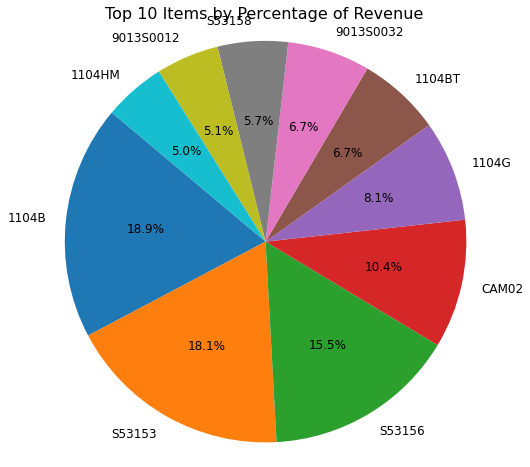

In [45]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming top_items contains the DataFrame with top 10 items and their percentages

# Plotting the pie chart with larger font sizes
plt.figure(figsize=(8, 8))
plt.pie(top_items['Percentage'], labels=top_items['Item'], autopct='%1.1f%%', startangle=140, textprops={'fontsize': 12})
plt.title('Top 10 Items by Percentage of Revenue', fontsize=16)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()


In [81]:
# Calculate quantities and revenues for two periods (e.g., two different years)
year_1 = 2018
year_2 = 2019

# Filter data for each period
period_1 = df[df['year'] == year_1]
period_2 = df[df['year'] == year_2]

# Calculate total quantity and revenue for each item in each period
quantity_period_1 = period_1.groupby('item')['qty'].sum().reset_index()
revenue_period_1 = period_1.groupby('item')['revenue'].sum().reset_index()
quantity_period_2 = period_2.groupby('item')['qty'].sum().reset_index()
revenue_period_2 = period_2.groupby('item')['revenue'].sum().reset_index()

# Merge the quantities and revenues for both periods based on the 'item' column
merged_quantity = pd.merge(quantity_period_1, quantity_period_2, on='item', suffixes=('_period_1', '_period_2'))
merged_revenue = pd.merge(revenue_period_1, revenue_period_2, on='item', suffixes=('_period_1', '_period_2'))

# Identify items where both quantity and revenue have decreased
decreasing_items = (merged_quantity['qty_period_2'] < merged_quantity['qty_period_1']) & (merged_revenue['revenue_period_2'] < merged_revenue['revenue_period_1'])
pd.options.display.float_format = '{:.0f}'.format

# Get the top ten items with decreased quantity and revenue
top_decreasing_items = merged_quantity[decreasing_items].head(10)

# Similarly, perform similar operations for customers to find top ten customers with reduced revenue
# You would filter, compare, and get the top ten customers based on your dataset's structure
print(top_decreasing_items)




         item  qty_period_1  qty_period_2
9       25V26           302           290
12    5032-TP          2505          2427
14  6030-3-TP           929           831
15    6030-TP          2475          2215
16    6032-TP           779           694
17      75V23            96            55
21     821730           965           262
23     821731          3581             8
30     901112             7             6
31     901113             4             2


In [86]:
# Calculate quantities and revenues for two periods (e.g., two different years)
year_1 = 2019
year_2 = 2020

# Filter data for each period
period_1 = df[df['year'] == year_1]
period_2 = df[df['year'] == year_2]

# Calculate total quantity and revenue for each item in each period
quantity_period_1 = period_1.groupby('item')['qty'].sum().reset_index()
revenue_period_1 = period_1.groupby('item')['revenue'].sum().reset_index()
quantity_period_2 = period_2.groupby('item')['qty'].sum().reset_index()
revenue_period_2 = period_2.groupby('item')['revenue'].sum().reset_index()

# Merge the quantities and revenues for both periods based on the 'item' column
merged_quantity = pd.merge(quantity_period_1, quantity_period_2, on='item', suffixes=('_period_1', '_period_2'))
merged_revenue = pd.merge(revenue_period_1, revenue_period_2, on='item', suffixes=('_period_1', '_period_2'))

# Identify items where both quantity and revenue have decreased
decreasing_items = (merged_quantity['qty_period_2'] < merged_quantity['qty_period_1']) & (merged_revenue['revenue_period_2'] < merged_revenue['revenue_period_1'])
pd.options.display.float_format = '{:.0f}'.format

# Get the top ten items with decreased quantity and revenue
top_decreasing_items = merged_quantity[decreasing_items].head(10)

# Similarly, perform similar operations for customers to find top ten customers with reduced revenue
# You would filter, compare, and get the top ten customers based on your dataset's structure
print(top_decreasing_items)



         item  qty_period_1  qty_period_2
2       1104G          6974          4552
4     1104HMT          2867          1348
7      161057           170           122
10      37V26          4723          3243
11    5032-TP          2427          2017
12      50V26          2481          2293
13  6030-3-TP           831           810
14    6030-TP          2215          2067
15    6032-TP           694           641
17     821705           968           494


In [87]:
# Calculate quantities and revenues for two periods (e.g., two different years)
year_1 = 2020
year_2 = 2021

# Filter data for each period
period_1 = df[df['year'] == year_1]
period_2 = df[df['year'] == year_2]

# Calculate total quantity and revenue for each item in each period
quantity_period_1 = period_1.groupby('item')['qty'].sum().reset_index()
revenue_period_1 = period_1.groupby('item')['revenue'].sum().reset_index()
quantity_period_2 = period_2.groupby('item')['qty'].sum().reset_index()
revenue_period_2 = period_2.groupby('item')['revenue'].sum().reset_index()

# Merge the quantities and revenues for both periods based on the 'item' column
merged_quantity = pd.merge(quantity_period_1, quantity_period_2, on='item', suffixes=('_period_1', '_period_2'))
merged_revenue = pd.merge(revenue_period_1, revenue_period_2, on='item', suffixes=('_period_1', '_period_2'))

# Identify items where both quantity and revenue have decreased
decreasing_items = (merged_quantity['qty_period_2'] < merged_quantity['qty_period_1']) & (merged_revenue['revenue_period_2'] < merged_revenue['revenue_period_1'])
pd.options.display.float_format = '{:.0f}'.format

# Get the top ten items with decreased quantity and revenue
top_decreasing_items = merged_quantity[decreasing_items].head(10)

# Similarly, perform similar operations for customers to find top ten customers with reduced revenue
# You would filter, compare, and get the top ten customers based on your dataset's structure
print(top_decreasing_items)




            item  qty_period_1  qty_period_2
1         1104BT          4459          3107
3         1104HM          3364          2691
6          11812             6             1
17        901125            15             4
18        901143             6             2
19        901165            13             6
21     9013L0203           913           720
36        901415            23             9
38  902-DMF25-TP          1184          1151
42  902-DMG25-TP           241           199


In [88]:
# Calculate quantities and revenues for two periods (e.g., two different years)
year_1 = 2021
year_2 = 2022

# Filter data for each period
period_1 = df[df['year'] == year_1]
period_2 = df[df['year'] == year_2]

# Calculate total quantity and revenue for each item in each period
quantity_period_1 = period_1.groupby('item')['qty'].sum().reset_index()
revenue_period_1 = period_1.groupby('item')['revenue'].sum().reset_index()
quantity_period_2 = period_2.groupby('item')['qty'].sum().reset_index()
revenue_period_2 = period_2.groupby('item')['revenue'].sum().reset_index()

# Merge the quantities and revenues for both periods based on the 'item' column
merged_quantity = pd.merge(quantity_period_1, quantity_period_2, on='item', suffixes=('_period_1', '_period_2'))
merged_revenue = pd.merge(revenue_period_1, revenue_period_2, on='item', suffixes=('_period_1', '_period_2'))

# Identify items where both quantity and revenue have decreased
decreasing_items = (merged_quantity['qty_period_2'] < merged_quantity['qty_period_1']) & (merged_revenue['revenue_period_2'] < merged_revenue['revenue_period_1'])
pd.options.display.float_format = '{:.0f}'.format

# Get the top ten items with decreased quantity and revenue
top_decreasing_items = merged_quantity[decreasing_items].head(10)

# Similarly, perform similar operations for customers to find top ten customers with reduced revenue
# You would filter, compare, and get the top ten customers based on your dataset's structure
print(top_decreasing_items)




         item  qty_period_1  qty_period_2
0       1104B         11375          7652
3      1104HM          2691          1933
5       1104L          1558           849
6       25V26           652           447
7       25V30          2656          2342
13    6032-TP           781           740
16  9013L0453          7549          6074
17  9013S0012         13721         13699
19  9013S0032         13478         12338
20  9013S0042          3944          3645


In [50]:
# Calculate quantities and revenues for two periods (e.g., two different years)
year_1 = 2021
year_2 = 2022

# Filter data for each period
period_1 = df[df['year'] == year_1]
period_2 = df[df['year'] == year_2]

# Calculate total quantity and revenue for each item in each period
quantity_period_1 = period_1.groupby('item')['qty'].sum().reset_index()
revenue_period_1 = period_1.groupby('item')['revenue'].sum().reset_index()
quantity_period_2 = period_2.groupby('item')['qty'].sum().reset_index()
revenue_period_2 = period_2.groupby('item')['revenue'].sum().reset_index()

# Merge the quantities for both periods based on the 'item' column
merged_quantity = pd.merge(quantity_period_1, quantity_period_2, on='item', suffixes=('_period_1', '_period_2'))

# Merge the revenues for both periods based on the 'item' column
merged_revenue = pd.merge(revenue_period_1, revenue_period_2, on='item', suffixes=('_period_1', '_period_2'))

# Merge the merged_quantity and merged_revenue DataFrames based on the 'item' column
merged_data = pd.merge(merged_quantity, merged_revenue, on='item')

# Identify items where both quantity and revenue have decreased
decreasing_items = (merged_data['qty_period_2'] < merged_data['qty_period_1']) & (merged_data['revenue_period_2'] < merged_data['revenue_period_1'])

# Get the top ten items with decreased quantity and revenue
top_decreasing_items = merged_data[decreasing_items].head(10)

# Print top decreasing items with both quantity and revenue information formatted as currency
result_columns = ['item', 'qty_period_1', 'qty_period_2', 'revenue_period_1', 'revenue_period_2']

# Format revenue columns as currency with two decimal places
top_decreasing_items['revenue_period_1'] = top_decreasing_items['revenue_period_1'].map('${:,.2f}'.format)
top_decreasing_items['revenue_period_2'] = top_decreasing_items['revenue_period_2'].map('${:,.2f}'.format)

print(top_decreasing_items[result_columns])


         item  qty_period_1  qty_period_2 revenue_period_1 revenue_period_2
0       1104B      11375.00       7652.00    $6,380,157.29    $4,938,510.95
3      1104HM       2691.00       1933.00    $1,536,477.85    $1,242,398.99
5       1104L       1558.00        849.00      $912,156.80      $601,328.37
6       25V26        652.00        447.00       $38,580.79       $27,082.47
7       25V30       2656.00       2342.00      $174,787.32      $154,199.35
13    6032-TP        781.00        740.00       $29,805.15       $29,662.44
16  9013L0453       7549.00       6074.00      $179,806.32      $154,690.81
17  9013S0012      13721.00      13699.00    $1,617,849.33    $1,451,777.37
19  9013S0032      13478.00      12338.00    $2,050,780.21    $1,948,415.69
20  9013S0042       3944.00       3645.00      $545,442.96      $492,474.95


In [51]:
# Calculate quantities and revenues for two periods (e.g., two different years)
year_1 = 2018
year_2 = 2019

# Filter data for each period
period_1 = df[df['year'] == year_1]
period_2 = df[df['year'] == year_2]

# Calculate total revenue for each customer in each period
revenue_period_1 = period_1.groupby('customer_account_name')['revenue'].sum().reset_index()
revenue_period_2 = period_2.groupby('customer_account_name')['revenue'].sum().reset_index()

# Merge the revenues for both periods based on the 'customer_account_name' column
merged_revenue = pd.merge(revenue_period_1, revenue_period_2, on='customer_account_name', suffixes=('_period_1', '_period_2'))

# Identify customers where revenue has decreased
decreasing_customers = merged_revenue['revenue_period_2'] < merged_revenue['revenue_period_1']

# Get the top ten customers with decreased revenue
top_decreasing_customers = merged_revenue[decreasing_customers].head(10)

# Reset index to create a count column starting from 1
top_decreasing_customers.reset_index(drop=True, inplace=True)
top_decreasing_customers.index += 1

# Format revenue columns as currency with two decimal places
top_decreasing_customers['revenue_period_1'] = top_decreasing_customers['revenue_period_1'].map('${:,.2f}'.format)
top_decreasing_customers['revenue_period_2'] = top_decreasing_customers['revenue_period_2'].map('${:,.2f}'.format)

# Rename the index to 'count'
top_decreasing_customers.index.name = 'count'

print(top_decreasing_customers[['customer_account_name', 'revenue_period_1', 'revenue_period_2']])


                  customer_account_name revenue_period_1 revenue_period_2
count                                                                    
1          ABBOTT NORTHWESTERN HOSPITAL       $26,659.37       $25,056.83
2           ABK NEUROLOGICAL ASSOCIATES        $3,330.60        $3,111.00
3                 ABRAZO CENTRAL CAMPUS          $640.00          $384.00
4            ABRAZO REGION SERVICES PBH          $640.00          $256.00
5      ACCELERATED RECOVERY SPECIALISTS          $573.00          $504.00
6                          ACTIMED SCRL        $4,497.95        $3,112.34
7                      ACUITY NEUROLOGY          $834.00          $278.00
8                                ADITUS        $3,102.80        $2,876.29
9        ADVANCED DIAGNOSTIC IMAGING PC        $2,013.00          $366.00
10          ADVANCED NEUROLOGICAL ASSOC          $366.00          $333.28


In [52]:
# Calculate quantities and revenues for two periods (e.g., two different years)
year_1 = 2019
year_2 = 2020

# Filter data for each period
period_1 = df[df['year'] == year_1]
period_2 = df[df['year'] == year_2]

# Calculate total revenue for each customer in each period
revenue_period_1 = period_1.groupby('customer_account_name')['revenue'].sum().reset_index()
revenue_period_2 = period_2.groupby('customer_account_name')['revenue'].sum().reset_index()

# Merge the revenues for both periods based on the 'customer_account_name' column
merged_revenue = pd.merge(revenue_period_1, revenue_period_2, on='customer_account_name', suffixes=('_period_1', '_period_2'))

# Identify customers where revenue has decreased
decreasing_customers = merged_revenue['revenue_period_2'] < merged_revenue['revenue_period_1']

# Get the top ten customers with decreased revenue
top_decreasing_customers = merged_revenue[decreasing_customers].head(10)

# Reset index to create a count column starting from 1
top_decreasing_customers.reset_index(drop=True, inplace=True)
top_decreasing_customers.index += 1

# Format revenue columns as currency with two decimal places
top_decreasing_customers['revenue_period_1'] = top_decreasing_customers['revenue_period_1'].map('${:,.2f}'.format)
top_decreasing_customers['revenue_period_2'] = top_decreasing_customers['revenue_period_2'].map('${:,.2f}'.format)

# Rename the index to 'count'
top_decreasing_customers.index.name = 'count'

print(top_decreasing_customers[['customer_account_name', 'revenue_period_1', 'revenue_period_2']])


                  customer_account_name revenue_period_1 revenue_period_2
count                                                                    
1             3B PAIN MANAGEMENT CENTER        $6,513.00        $3,111.00
2          ABBOTT NORTHWESTERN HOSPITAL       $25,056.83       $21,593.56
3                         ABBVIE US LLC      $439,937.00      $292,950.00
4                  ABDUL HAFIZ ELETR MD          $542.60          $501.60
5            ABINGTON MEMORIAL HOSPITAL       $13,710.54        $7,232.52
6      ABINGTON NEUROLOGICAL ASSOCIATES        $4,012.00        $3,458.00
7           ABK NEUROLOGICAL ASSOCIATES        $3,111.00        $3,029.20
8      ACCELERATED RECOVERY SPECIALISTS          $504.00          $299.00
9        ADAMS COUNTY MEMORIAL HOSPITAL        $3,074.06          $792.30
10                               ADITUS        $2,876.29        $1,193.40


In [53]:
# Calculate quantities and revenues for two periods (e.g., two different years)
year_1 = 2020
year_2 = 2021

# Filter data for each period
period_1 = df[df['year'] == year_1]
period_2 = df[df['year'] == year_2]

# Calculate total revenue for each customer in each period
revenue_period_1 = period_1.groupby('customer_account_name')['revenue'].sum().reset_index()
revenue_period_2 = period_2.groupby('customer_account_name')['revenue'].sum().reset_index()

# Merge the revenues for both periods based on the 'customer_account_name' column
merged_revenue = pd.merge(revenue_period_1, revenue_period_2, on='customer_account_name', suffixes=('_period_1', '_period_2'))

# Identify customers where revenue has decreased
decreasing_customers = merged_revenue['revenue_period_2'] < merged_revenue['revenue_period_1']

# Get the top ten customers with decreased revenue
top_decreasing_customers = merged_revenue[decreasing_customers].head(10)

# Reset index to create a count column starting from 1
top_decreasing_customers.reset_index(drop=True, inplace=True)
top_decreasing_customers.index += 1

# Format revenue columns as currency with two decimal places
top_decreasing_customers['revenue_period_1'] = top_decreasing_customers['revenue_period_1'].map('${:,.2f}'.format)
top_decreasing_customers['revenue_period_2'] = top_decreasing_customers['revenue_period_2'].map('${:,.2f}'.format)

# Rename the index to 'count'
top_decreasing_customers.index.name = 'count'

print(top_decreasing_customers[['customer_account_name', 'revenue_period_1', 'revenue_period_2']])


                                   customer_account_name revenue_period_1  \
count                                                                       
1      *CISSS CHAUDIERE-APPALACHES-LÉVIS (BOUL WILFRI...        $4,299.15   
2                              3B PAIN MANAGEMENT CENTER        $3,111.00   
3                             ABINGTON MEMORIAL HOSPITAL        $7,232.52   
4                       ABINGTON NEUROLOGICAL ASSOCIATES        $3,458.00   
5                                  ABRAZO CENTRAL CAMPUS       $17,376.45   
6                                     ABRAZO WEST CAMPUS       $96,417.78   
7                                                 ADITUS        $1,193.40   
8                         ADVANCED DIAGNOSTIC IMAGING PC        $1,610.40   
9                    ADVANCED NEUROLOGY OF THE PALM BEAC        $1,413.00   
10                      ADVANCED ORTHOPAEDIC SPECIALISTS        $2,164.10   

      revenue_period_2  
count                   
1            $4,011.19  


In [54]:
# Calculate quantities and revenues for two periods (e.g., two different years)
year_1 = 2021
year_2 = 2022

# Filter data for each period
period_1 = df[df['year'] == year_1]
period_2 = df[df['year'] == year_2]

# Calculate total revenue for each customer in each period
revenue_period_1 = period_1.groupby('customer_account_name')['revenue'].sum().reset_index()
revenue_period_2 = period_2.groupby('customer_account_name')['revenue'].sum().reset_index()

# Merge the revenues for both periods based on the 'customer_account_name' column
merged_revenue = pd.merge(revenue_period_1, revenue_period_2, on='customer_account_name', suffixes=('_period_1', '_period_2'))

# Identify customers where revenue has decreased
decreasing_customers = merged_revenue['revenue_period_2'] < merged_revenue['revenue_period_1']

# Get the top ten customers with decreased revenue
top_decreasing_customers = merged_revenue[decreasing_customers].head(10)

# Reset index to create a count column starting from 1
top_decreasing_customers.reset_index(drop=True, inplace=True)
top_decreasing_customers.index += 1

# Format revenue columns as currency with two decimal places
top_decreasing_customers['revenue_period_1'] = top_decreasing_customers['revenue_period_1'].map('${:,.2f}'.format)
top_decreasing_customers['revenue_period_2'] = top_decreasing_customers['revenue_period_2'].map('${:,.2f}'.format)

# Rename the index to 'count'
top_decreasing_customers.index.name = 'count'

print(top_decreasing_customers[['customer_account_name', 'revenue_period_1', 'revenue_period_2']])



                                   customer_account_name revenue_period_1  \
count                                                                       
1      *CISSS CHAUDIERE-APPALACHES-LÉVIS (BOUL WILFRI...        $4,011.19   
2                           ABBOTT NORTHWESTERN HOSPITAL       $40,159.92   
3                                   ABDUL HAFIZ ELETR MD        $4,071.60   
4                             ABINGTON MEMORIAL HOSPITAL        $3,713.24   
5                            ABK NEUROLOGICAL ASSOCIATES        $4,548.10   
6                               ABRAZO SCOTTSDALE CAMPUS          $384.00   
7                                     ABRAZO WEST CAMPUS       $17,649.00   
8                          ADIRONDACK NEUROLOGY ASSOC PC        $3,093.00   
9                            ADVANCED MEDICAL MANAGEMENT        $1,098.00   
10                           ADVANCED NEUROLOGICAL ASSOC          $340.49   

      revenue_period_2  
count                   
1            $3,428.61  


In [55]:
# Filter data for the specified quarters
quarter_1 = '2022 Q 3'
quarter_2 = '2023 Q 3'

period_1 = df[df['actual_first_shipped_quarter'] == quarter_1]
period_2 = df[df['actual_first_shipped_quarter'] == quarter_2]

# Calculate total revenue for each customer in each period
revenue_period_1 = period_1.groupby('customer_account_name')['revenue'].sum().reset_index()
revenue_period_2 = period_2.groupby('customer_account_name')['revenue'].sum().reset_index()

# Merge the revenues for both periods based on the 'customer_account_name' column
merged_revenue = pd.merge(revenue_period_1, revenue_period_2, on='customer_account_name', suffixes=('_period_1', '_period_2'))

# Identify customers where revenue has decreased
decreasing_customers = merged_revenue['revenue_period_2'] < merged_revenue['revenue_period_1']

# Get the top ten customers with decreased revenue
top_decreasing_customers = merged_revenue[decreasing_customers].head(10)

# Reset index to create a count column starting from 1
top_decreasing_customers.reset_index(drop=True, inplace=True)
top_decreasing_customers.index += 1

# Format revenue columns as currency with two decimal places
top_decreasing_customers['revenue_period_1'] = top_decreasing_customers['revenue_period_1'].map('${:,.2f}'.format)
top_decreasing_customers['revenue_period_2'] = top_decreasing_customers['revenue_period_2'].map('${:,.2f}'.format)

# Rename the index to 'count'
top_decreasing_customers.index.name = 'count'

print(top_decreasing_customers[['customer_account_name', 'revenue_period_1', 'revenue_period_2']])


                                   customer_account_name revenue_period_1  \
count                                                                       
1      *CISSS CHAUDIERE-APPALACHES-LÉVIS (BOUL WILFRI...          $310.01   
2                                  ABRAZO CENTRAL CAMPUS        $1,995.00   
3                                     ABRAZO WEST CAMPUS        $3,127.00   
4                            ADVANCED NEUROLOGICAL ASSOC          $227.30   
5                       ADVANCED NEUROLOGICAL ASSOCIATES        $5,240.16   
6                       ADVANCED NEUROSCIENCE CLINIC, PA        $1,378.70   
7                                           ADVENTHEALTH       $13,778.60   
8                             ADVENTHEALTH CENTRAL TEXAS          $600.40   
9                        ADVOCATE CONDELL MEDICAL CENTER       $32,850.75   
10                      ADVOCATE HEALTHCARE SUPPLY CHAIN        $4,628.00   

      revenue_period_2  
count                   
1              $154.23  


In [56]:
# Filter data for the specified quarters
quarter_1 = '2022 Q 2'
quarter_2 = '2023 Q 1'

period_1 = df[df['actual_first_shipped_quarter'] == quarter_1]
period_2 = df[df['actual_first_shipped_quarter'] == quarter_2]

# Calculate total revenue for each customer in each period
revenue_period_1 = period_1.groupby('customer_account_name')['revenue'].sum().reset_index()
revenue_period_2 = period_2.groupby('customer_account_name')['revenue'].sum().reset_index()

# Merge the revenues for both periods based on the 'customer_account_name' column
merged_revenue = pd.merge(revenue_period_1, revenue_period_2, on='customer_account_name', suffixes=('_period_1', '_period_2'))

# Identify customers where revenue has decreased
decreasing_customers = merged_revenue['revenue_period_2'] < merged_revenue['revenue_period_1']

# Get the top ten customers with decreased revenue
top_decreasing_customers = merged_revenue[decreasing_customers].head(10)

# Reset index to create a count column starting from 1
top_decreasing_customers.reset_index(drop=True, inplace=True)
top_decreasing_customers.index += 1

# Format revenue columns as currency with two decimal places
top_decreasing_customers['revenue_period_1'] = top_decreasing_customers['revenue_period_1'].map('${:,.2f}'.format)
top_decreasing_customers['revenue_period_2'] = top_decreasing_customers['revenue_period_2'].map('${:,.2f}'.format)

# Rename the index to 'count'
top_decreasing_customers.index.name = 'count'

print(top_decreasing_customers[['customer_account_name', 'revenue_period_1', 'revenue_period_2']])


                       customer_account_name revenue_period_1 revenue_period_2
count                                                                         
1                  3B PAIN MANAGEMENT CENTER        $3,492.00          $388.00
2                 A.S.F.A. HOPITAL D'ENFANTS        $5,168.74          $963.50
3      ABBAS RIZVI MEDICAL PROFESSIONAL CORP          $728.33          $671.82
4               ABBOTT NORTHWESTERN HOSPITAL        $8,614.49        $7,128.66
5                              ABBVIE US LLC      $161,125.00      $117,750.15
6           ABINGTON NEUROLOGICAL ASSOCIATES          $637.00          $498.00
7                      ABRAZO CENTRAL CAMPUS        $3,937.50          $934.50
8                   ABRAZO SCOTTSDALE CAMPUS          $300.00          $160.00
9              ADIRONDACK NEUROLOGY ASSOC PC          $882.00          $629.00
10                 ADVANCED NEUROLOGY CENTER        $2,878.50        $1,474.40


In [57]:
# Filter data for the specified quarters
quarter_1 = '2022 Q 1'
quarter_2 = '2023 Q 1'

period_1 = df[df['actual_first_shipped_quarter'] == quarter_1]
period_2 = df[df['actual_first_shipped_quarter'] == quarter_2]

# Calculate total revenue for each customer in each period
revenue_period_1 = period_1.groupby('customer_account_name')['revenue'].sum().reset_index()
revenue_period_2 = period_2.groupby('customer_account_name')['revenue'].sum().reset_index()

# Merge the revenues for both periods based on the 'customer_account_name' column
merged_revenue = pd.merge(revenue_period_1, revenue_period_2, on='customer_account_name', suffixes=('_period_1', '_period_2'))

# Identify customers where revenue has decreased
decreasing_customers = merged_revenue['revenue_period_2'] < merged_revenue['revenue_period_1']

# Get the top ten customers with decreased revenue
top_decreasing_customers = merged_revenue[decreasing_customers].head(10)

# Reset index to create a count column starting from 1
top_decreasing_customers.reset_index(drop=True, inplace=True)
top_decreasing_customers.index += 1

# Format revenue columns as currency with two decimal places
top_decreasing_customers['revenue_period_1'] = top_decreasing_customers['revenue_period_1'].map('${:,.2f}'.format)
top_decreasing_customers['revenue_period_2'] = top_decreasing_customers['revenue_period_2'].map('${:,.2f}'.format)

# Rename the index to 'count'
top_decreasing_customers.index.name = 'count'

print(top_decreasing_customers[['customer_account_name', 'revenue_period_1', 'revenue_period_2']])


                                   customer_account_name revenue_period_1  \
count                                                                       
1      *CISSS CHAUDIERE-APPALACHES-LÉVIS (BOUL WILFRI...        $2,294.68   
2          *CIUSSS DE L'EST-DE-L'ILE-DE-MTL  -ST-ZOTIQUE          $736.94   
3                             A.S.F.A. HOPITAL D'ENFANTS        $1,928.19   
4                                          ABBVIE US LLC      $161,048.00   
5                                   ABDUL HAFIZ ELETR MD        $1,386.60   
6                                  ABRAZO CENTRAL CAMPUS        $6,336.00   
7                          ADENA REGIONAL MEDICAL CENTER        $2,657.88   
8                          ADIRONDACK NEUROLOGY ASSOC PC          $651.00   
9                       ADVANCED NEUROLOGICAL ASSOCIATES        $5,134.16   
10                            ADVENTHEALTH CENTRAL TEXAS          $300.20   

      revenue_period_2  
count                   
1              $522.13  


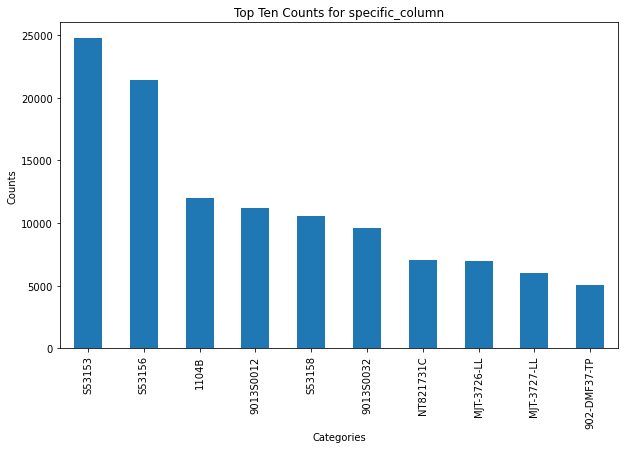

In [58]:
import pandas as pd
import matplotlib.pyplot as plt

counts = df['item'].value_counts()

# Get the top ten counts
top_ten = counts.head(10)

# Plotting the bar graph
plt.figure(figsize=(10, 6))
top_ten.plot(kind='bar')
plt.title('Top Ten Counts for specific_column')
plt.xlabel('Categories')
plt.ylabel('Counts')
plt.show()


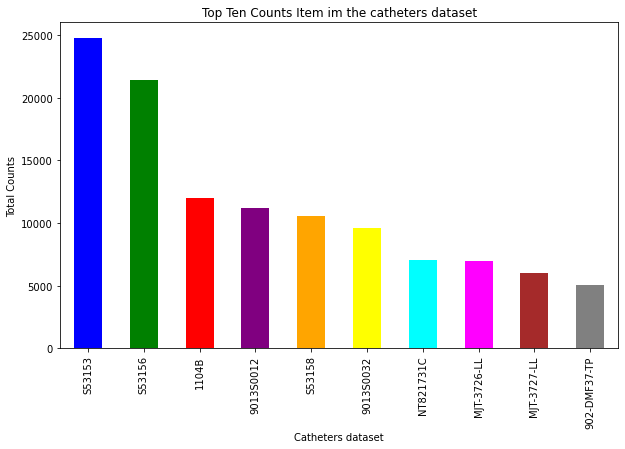

In [59]:
import pandas as pd
import matplotlib.pyplot as plt

counts = df['item'].value_counts()

# Get the top ten counts
top_ten = counts.head(10)

# Define colors for the bars
colors = ['blue', 'green', 'red', 'purple', 'orange', 'yellow', 'cyan', 'magenta', 'brown', 'gray']

# Plotting the bar graph with specified colors
plt.figure(figsize=(10, 6))
top_ten.plot(kind='bar', color=colors)
plt.title('Top Ten Counts Item im the catheters dataset')
plt.xlabel('Catheters dataset')
plt.ylabel('Total Counts')
plt.show()


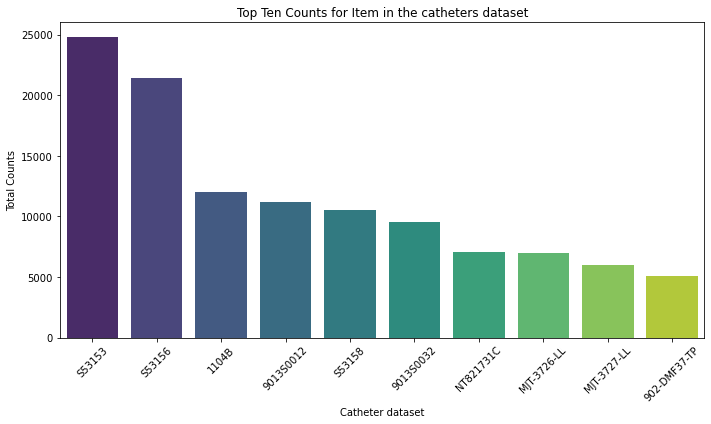

In [60]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

counts = df['item'].value_counts()

# Get the top ten counts
top_ten = counts.head(10).reset_index()

# Rename columns for better representation in the plot
top_ten.columns = ['Categories', 'Counts']

# Plotting using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Categories', y='Counts', data=top_ten, palette='viridis')
plt.title('Top Ten Counts for Item in the catheters dataset')
plt.xlabel('Catheter dataset')
plt.ylabel('Total Counts')
plt.xticks(rotation=45)  # Rotate x-labels for better readability
plt.tight_layout()
plt.show()


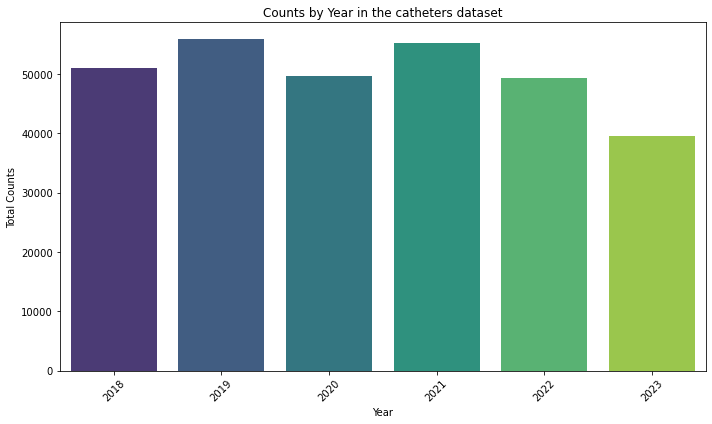

In [61]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

counts_by_year = df['year'].value_counts().reset_index()
counts_by_year.columns = ['Year', 'Counts']

# Plotting counts by year using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Year', y='Counts', data=counts_by_year, palette='viridis')
plt.title('Counts by Year in the catheters dataset')
plt.xlabel('Year')
plt.ylabel('Total Counts')
plt.xticks(rotation=45)  # Rotate x-labels for better readability
plt.tight_layout()
plt.show()


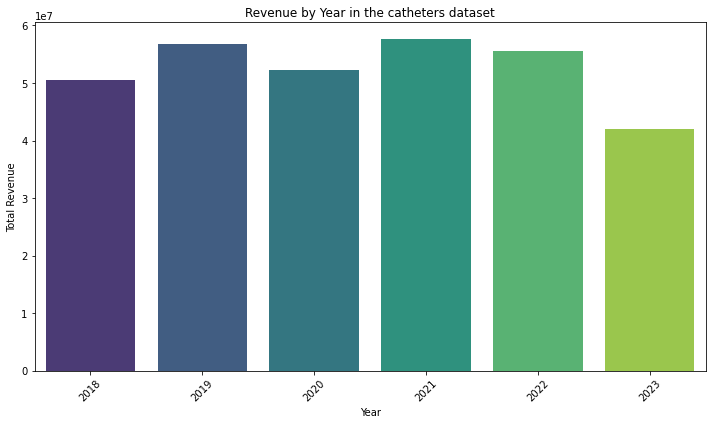

In [62]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

revenue_by_year = df.groupby('year')['revenue'].sum().reset_index()

# Plotting revenue by year using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='year', y='revenue', data=revenue_by_year, palette='viridis')
plt.title('Revenue by Year in the catheters dataset')
plt.xlabel('Year')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)  # Rotate x-labels for better readability
plt.tight_layout()
plt.show()


In [63]:
import pandas as pd

counts = df['customer_name'].value_counts()
print(counts)


MEDLINE INDUSTRIES, INC                                                                      3574
MVAP MEDICAL SUPPLY                                                                          3563
ALMEVAN S.L.                                                                                 3060
HENRY SCHEIN, INC                                                                            2700
KEGO CORPORATION                                                                             1284
KEGO CORPORATION USA                                                                         1212
CLEVELAND CLINIC HEALTH SYSTEM                                                               1082
NEUROLITE AG                                                                                  955
NORTHWESTERN MEMORIAL HOSPITAL                                                                899
PHYSIOTEC MEDICAL EQUIPMENT (HONG KONG) LTD.                                                  896
UNIV. OF WISCONSIN H

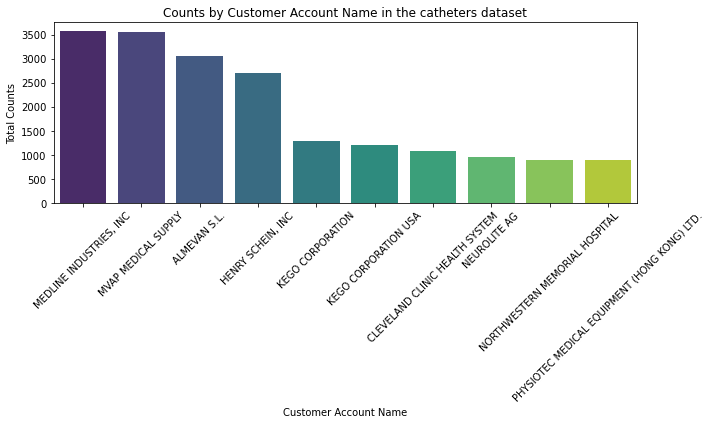

In [64]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

counts_by_customer = df['customer_name'].value_counts().reset_index()
counts_by_customer.columns = ['Customer Account Name', 'Counts']

# Plotting counts by customer account using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Customer Account Name', y='Counts', data=counts_by_customer.head(10), palette='viridis')
plt.title('Counts by Customer Account Name in the catheters dataset')
plt.xlabel('Customer Account Name')
plt.ylabel('Total Counts')
plt.xticks(rotation=45)  # Rotate x-labels for better readability
plt.tight_layout()
plt.show()


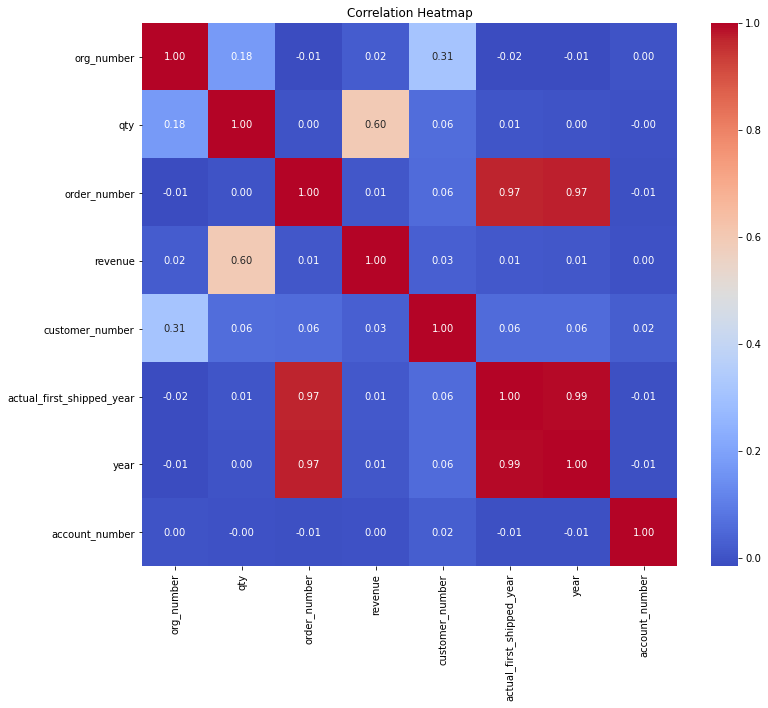

In [65]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
# Drop non-numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Compute correlation matrix
correlation_matrix = numeric_df.corr()

# Plotting the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


In [66]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency

# first heatmap using the four categorical columns to check for strength of associations
cat_columns = ['order_type', 'customer_type', 'product_group', 'abc_classification']

# Create a function to calculate Cramér's V
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    rcorr = r - ((r - 1) ** 2) / (n - 1)
    kcorr = k - ((k - 1) ** 2) / (n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

# Calculate Cramér's V for pairs of categorical variables
cramer_matrix = pd.DataFrame(index=cat_columns, columns=cat_columns)
for i in cat_columns:
    for j in cat_columns:
        cramers = cramers_v(df[i], df[j])
        cramer_matrix.loc[i, j] = cramers

print("Cramér's V matrix for categorical variables:")
print(cramer_matrix)


Cramér's V matrix for categorical variables:
                   order_type customer_type product_group abc_classification
order_type               1.00          0.35          0.23               0.26
customer_type            0.35          1.00          0.29               0.23
product_group            0.23          0.29          1.00               0.27
abc_classification       0.26          0.23          0.27               1.00


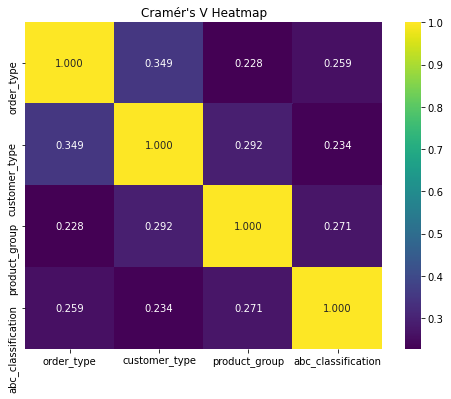

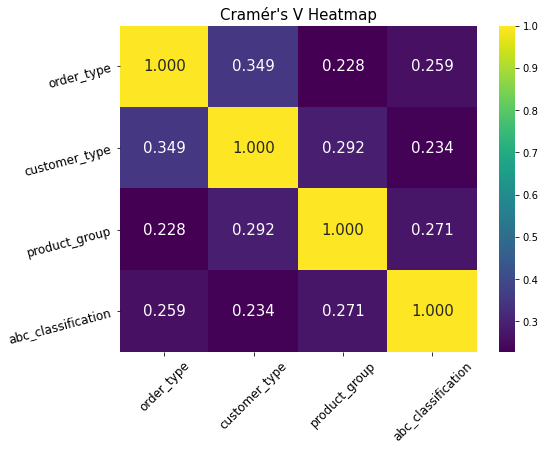

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt

# Your Cramér's V matrix
cramer_matrix = {
    'order_type': [1, 0.349119, 0.227959, 0.25873],
    'customer_type': [0.349119, 1, 0.291971, 0.233622],
    'product_group': [0.227959, 0.291971, 1, 0.270871],
    'abc_classification': [0.25873, 0.233622, 0.270871, 1]
}

# Convert the matrix to a DataFrame
cramer_df = pd.DataFrame(cramer_matrix, index=cramer_matrix.keys())

# Create the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cramer_df, annot=True, cmap='viridis', fmt=".3f")
plt.title("Cramér's V Heatmap")
plt.show()

# Create the heatmap with larger fonts and a rotation for column names
plt.figure(figsize=(8, 6))
heatmap = sns.heatmap(cramer_df, annot=True, cmap='viridis', fmt=".3f", annot_kws={'size': 15})
# Increase xticks and yticks font size with rotation
heatmap.set_xticklabels(heatmap.get_xticklabels(), fontsize=12, rotation=45)
heatmap.set_yticklabels(heatmap.get_yticklabels(), fontsize=12, rotation=15)
plt.title("Cramér's V Heatmap", fontsize = 15)
plt.show()


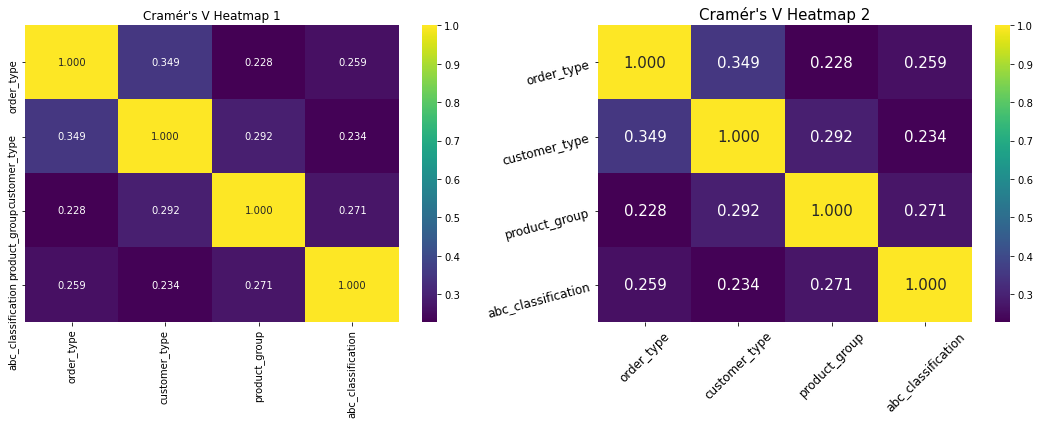

In [68]:
# Convert the matrix to a DataFrame
cramer_df = pd.DataFrame(cramer_matrix, index=cramer_matrix.keys())

# Create subplots with 1 row and 2 columns
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# Create the first heatmap
sns.heatmap(cramer_df, annot=True, cmap='viridis', fmt=".3f", ax=axs[0])
axs[0].set_title("Cramér's V Heatmap 1")

# Create the second heatmap
heatmap = sns.heatmap(cramer_df, annot=True, cmap='viridis', fmt=".3f", annot_kws={'size': 15}, ax=axs[1])
heatmap.set_xticklabels(heatmap.get_xticklabels(), fontsize=12, rotation=45)
heatmap.set_yticklabels(heatmap.get_yticklabels(), fontsize=12, rotation=15)
axs[1].set_title("Cramér's V Heatmap 2", fontsize=15)

plt.tight_layout()  # Adjusts subplot parameters to fit the figure area
plt.show()

In [69]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency

# second heatmap using the four categorical columns to check for strength of associations
cat_columns = ['order_type', 'customer_type', 'product_group', 'item']

# Create a function to calculate Cramér's V
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    rcorr = r - ((r - 1) ** 2) / (n - 1)
    kcorr = k - ((k - 1) ** 2) / (n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

# Calculate Cramér's V for pairs of categorical variables
cramer_matrix = pd.DataFrame(index=cat_columns, columns=cat_columns)
for i in cat_columns:
    for j in cat_columns:
        cramers = cramers_v(df[i], df[j])
        cramer_matrix.loc[i, j] = cramers

print("Cramér's V matrix for categorical variables:")
print(cramer_matrix)

Cramér's V matrix for categorical variables:
              order_type customer_type product_group item
order_type          1.00          0.35          0.23 0.21
customer_type       0.35          1.00          0.29 0.26
product_group       0.23          0.29          1.00 1.00
item                0.21          0.26          1.00 1.00


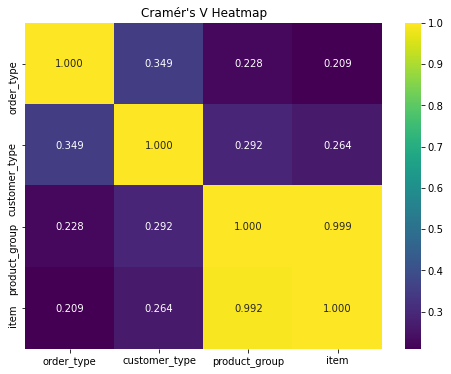

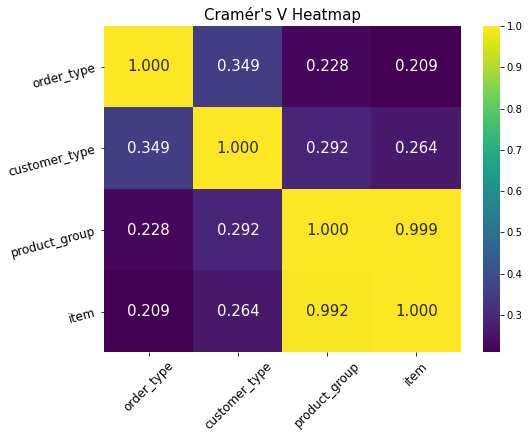

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt

# Your Cramér's V matrix
cramer_matrix = {
    'order_type': [1, 0.349119, 0.227959, 0.209491],
    'customer_type': [0.349119, 1, 0.291971, 0.264486],
    'product_group': [0.227959, 0.291971, 1, 0.99204],
    'item': [0.209491, 0.264486, 0.999204, 1]
}

# Convert the matrix to a DataFrame
cramer_df = pd.DataFrame(cramer_matrix, index=cramer_matrix.keys())

# Create the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cramer_df, annot=True, cmap='viridis', fmt=".3f")
plt.title("Cramér's V Heatmap")
plt.show()

# # Create the heatmap with larger fonts and a rotation for column names
plt.figure(figsize=(8, 6))
heatmap = sns.heatmap(cramer_df, annot=True, cmap='viridis', fmt=".3f", annot_kws={'size': 15})
# Increase xticks and yticks font size with rotation
heatmap.set_xticklabels(heatmap.get_xticklabels(), fontsize=12, rotation=45)
heatmap.set_yticklabels(heatmap.get_yticklabels(), fontsize=12, rotation=15)
plt.title("Cramér's V Heatmap", fontsize = 15)
plt.show()


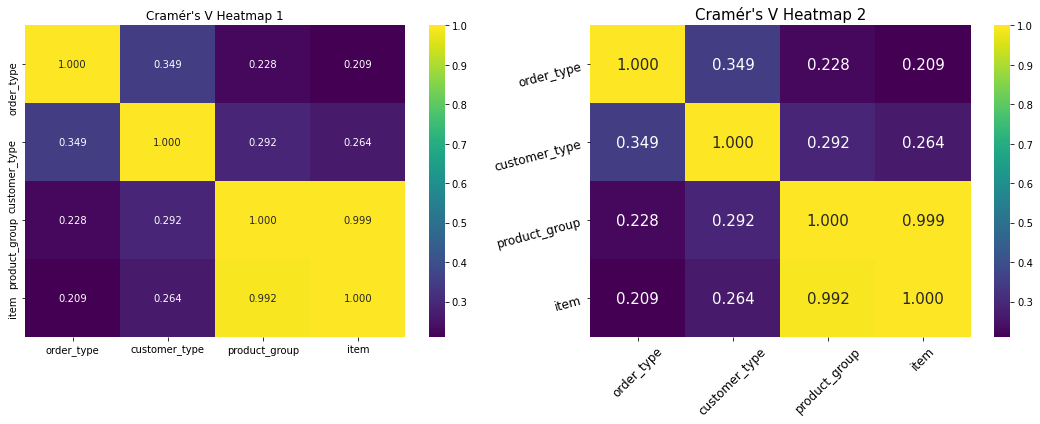

In [71]:
# Convert the matrix to a DataFrame
cramer_df = pd.DataFrame(cramer_matrix, index=cramer_matrix.keys())

# Create subplots with 1 row and 2 columns
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# Create the first heatmap
sns.heatmap(cramer_df, annot=True, cmap='viridis', fmt=".3f", ax=axs[0])
axs[0].set_title("Cramér's V Heatmap 1")

# Create the second heatmap
heatmap = sns.heatmap(cramer_df, annot=True, cmap='viridis', fmt=".3f", annot_kws={'size': 15}, ax=axs[1])
heatmap.set_xticklabels(heatmap.get_xticklabels(), fontsize=12, rotation=45)
heatmap.set_yticklabels(heatmap.get_yticklabels(), fontsize=12, rotation=15)
axs[1].set_title("Cramér's V Heatmap 2", fontsize=15)

plt.tight_layout()  # Adjusts subplot parameters to fit the figure area
plt.show()


In [72]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency

# third heatmap using the four categorical columns to check for strength of associations
cat_columns = ['order_type', 'product_sub_type', 'customer_name', 'item']

# Create a function to calculate Cramér's V
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    rcorr = r - ((r - 1) ** 2) / (n - 1)
    kcorr = k - ((k - 1) ** 2) / (n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

# Calculate Cramér's V for pairs of categorical variables
cramer_matrix = pd.DataFrame(index=cat_columns, columns=cat_columns)
for i in cat_columns:
    for j in cat_columns:
        cramers = cramers_v(df[i], df[j])
        cramer_matrix.loc[i, j] = cramers

print("Cramér's V matrix for categorical variables:")
print(cramer_matrix)

Cramér's V matrix for categorical variables:
                 order_type product_sub_type customer_name item
order_type             1.00             0.26          0.66 0.21
product_sub_type       0.26             1.00          0.50 1.00
customer_name          0.66             0.50          1.00 0.24
item                   0.21             1.00          0.24 1.00


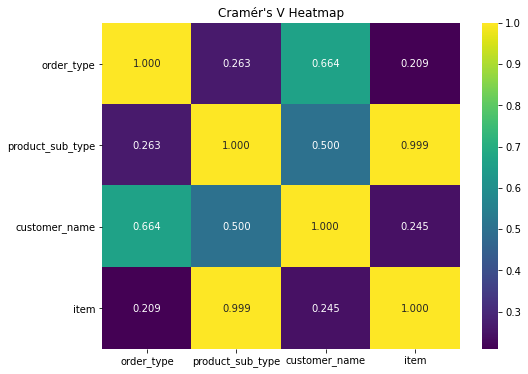

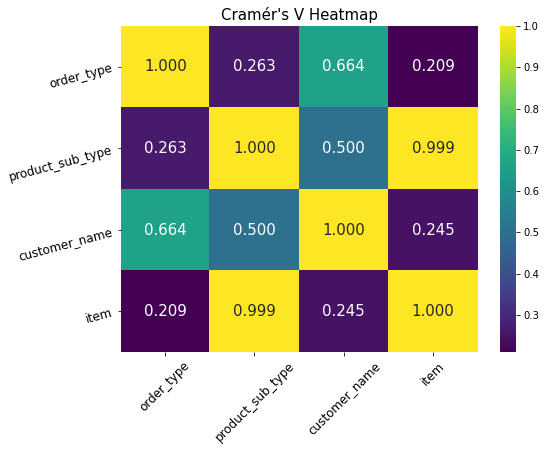

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt

# Your Cramér's V matrix
cramer_matrix = {
    'order_type': [1, 0.262553, 0.663647, 0.209491],
    'product_sub_type': [0.262553, 1, 0.500399, 0.999212],
    'customer_name': [0.663647, 0.500399, 1, 0.244817],
    'item': [0.209491, 0.999212, 0.244817, 1]
}

# Convert the matrix to a DataFrame
cramer_df = pd.DataFrame(cramer_matrix, index=cramer_matrix.keys())

# Create the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cramer_df, annot=True, cmap='viridis', fmt=".3f")
plt.title("Cramér's V Heatmap")
plt.show()

# # Create the heatmap with larger fonts and a rotation for column names
plt.figure(figsize=(8, 6))
heatmap = sns.heatmap(cramer_df, annot=True, cmap='viridis', fmt=".3f", annot_kws={'size': 15})
# Increase xticks and yticks font size with rotation
heatmap.set_xticklabels(heatmap.get_xticklabels(), fontsize=12, rotation=45)
heatmap.set_yticklabels(heatmap.get_yticklabels(), fontsize=12, rotation=15)
plt.title("Cramér's V Heatmap", fontsize = 15)
plt.show()



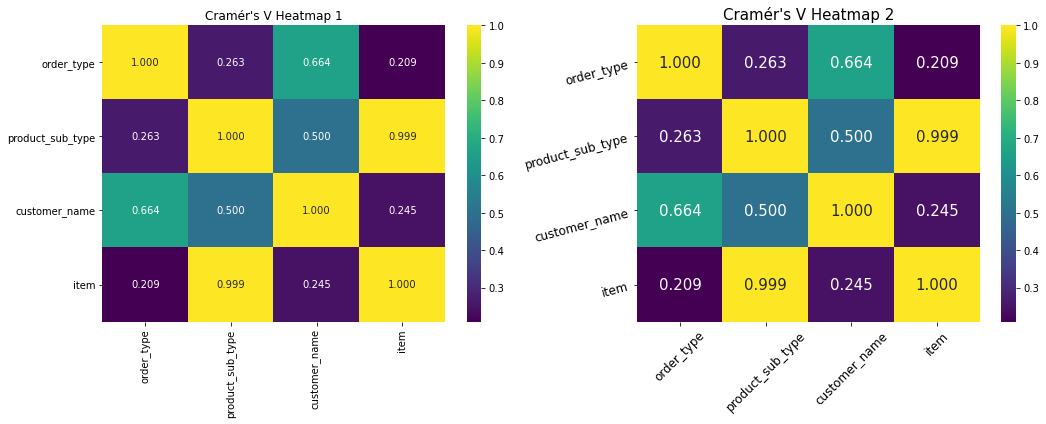

In [74]:
# Convert the matrix to a DataFrame
cramer_df = pd.DataFrame(cramer_matrix, index=cramer_matrix.keys())

# Create subplots with 1 row and 2 columns
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# Create the first heatmap
sns.heatmap(cramer_df, annot=True, cmap='viridis', fmt=".3f", ax=axs[0])
axs[0].set_title("Cramér's V Heatmap 1")

# Create the second heatmap
heatmap = sns.heatmap(cramer_df, annot=True, cmap='viridis', fmt=".3f", annot_kws={'size': 15}, ax=axs[1])
heatmap.set_xticklabels(heatmap.get_xticklabels(), fontsize=12, rotation=45)
heatmap.set_yticklabels(heatmap.get_yticklabels(), fontsize=12, rotation=15)
axs[1].set_title("Cramér's V Heatmap 2", fontsize=15)

plt.tight_layout()  # Adjusts subplot parameters to fit the figure area
plt.show()


In [75]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency

# fourth heatmap using the four categorical columns to check for strength of associations
cat_columns = ['customer_category', 'siebel_account_type', 'customer_name', 'item']

# Create a function to calculate Cramér's V
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    rcorr = r - ((r - 1) ** 2) / (n - 1)
    kcorr = k - ((k - 1) ** 2) / (n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

# Calculate Cramér's V for pairs of categorical variables
cramer_matrix = pd.DataFrame(index=cat_columns, columns=cat_columns)
for i in cat_columns:
    for j in cat_columns:
        cramers = cramers_v(df[i], df[j])
        cramer_matrix.loc[i, j] = cramers

print("Cramér's V matrix for categorical variables:")
print(cramer_matrix)

Cramér's V matrix for categorical variables:
                    customer_category siebel_account_type customer_name item
customer_category                1.00                0.66          0.99 0.22
siebel_account_type              0.66                1.00          0.98 0.16
customer_name                    0.99                0.98          1.00 0.24
item                             0.22                0.16          0.24 1.00


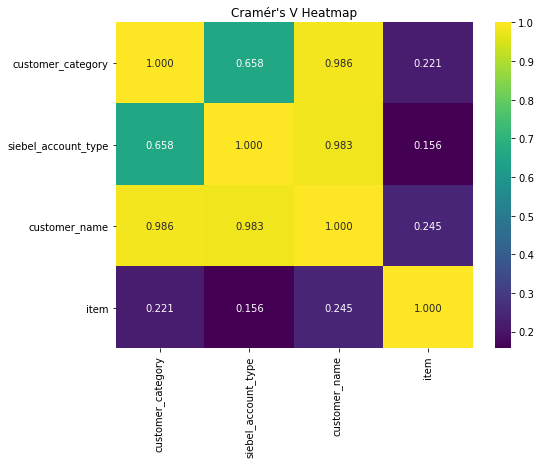

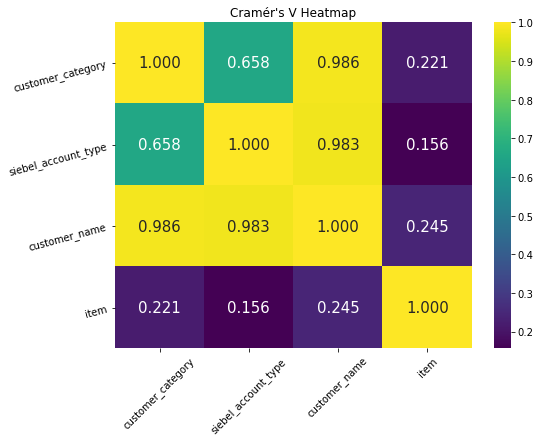

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt

# Your Cramér's V matrix
cramer_matrix = {
    'customer_category': [1, 0.657863, 0.985942, 0.220651],
    'siebel_account_type': [0.657863, 1, 0.982810, 0.156364],
    'customer_name': [0.985942, 0.982810, 1, 0.244817],
    'item': [0.220651, 0.156364, 0.244817, 1]
}

# Convert the matrix to a DataFrame
cramer_df = pd.DataFrame(cramer_matrix, index=cramer_matrix.keys())

# Create the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cramer_df, annot=True, cmap='viridis', fmt=".3f")
plt.title("Cramér's V Heatmap")
plt.show()

# # Create the heatmap with larger fonts and a rotation for column names
plt.figure(figsize=(8, 6))
sns.heatmap(cramer_df, annot=True, cmap='viridis', fmt=".3f", annot_kws={'size': 15})
plt.xticks(rotation=45)
plt.yticks(rotation=15)
plt.title("Cramér's V Heatmap")
plt.show()



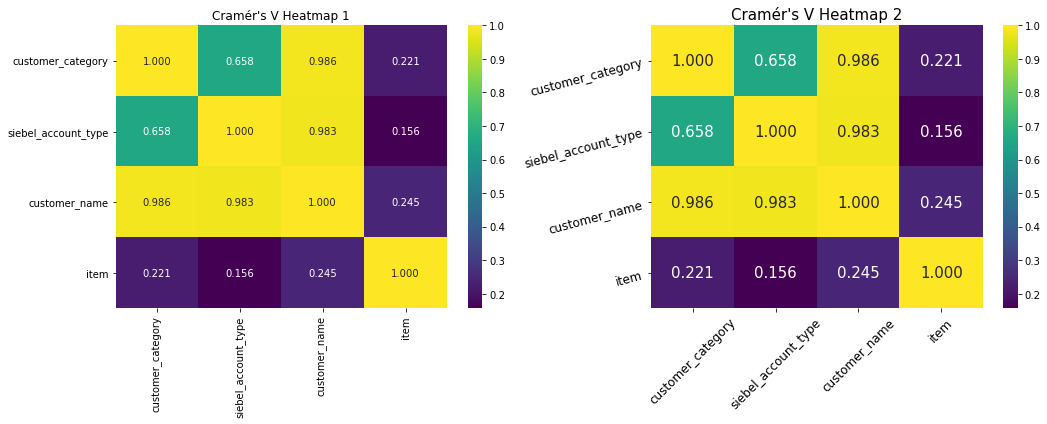

In [77]:
# Convert the matrix to a DataFrame
cramer_df = pd.DataFrame(cramer_matrix, index=cramer_matrix.keys())

# Create subplots with 1 row and 2 columns
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# Create the first heatmap
sns.heatmap(cramer_df, annot=True, cmap='viridis', fmt=".3f", ax=axs[0])
axs[0].set_title("Cramér's V Heatmap 1")

# Create the second heatmap
heatmap = sns.heatmap(cramer_df, annot=True, cmap='viridis', fmt=".3f", annot_kws={'size': 15}, ax=axs[1])
heatmap.set_xticklabels(heatmap.get_xticklabels(), fontsize=12, rotation=45)
heatmap.set_yticklabels(heatmap.get_yticklabels(), fontsize=12, rotation=15)
axs[1].set_title("Cramér's V Heatmap 2", fontsize=15)

plt.tight_layout()  # Adjusts subplot parameters to fit the figure area
plt.show()


In [78]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency

# fifth heatmap using the four categorical columns to check for strength of associations
cat_columns = ['customer_category', 'siebel_account_type', 'customer_name', 'product_class']

# Create a function to calculate Cramér's V
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    rcorr = r - ((r - 1) ** 2) / (n - 1)
    kcorr = k - ((k - 1) ** 2) / (n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

# Calculate Cramér's V for pairs of categorical variables
cramer_matrix = pd.DataFrame(index=cat_columns, columns=cat_columns)
for i in cat_columns:
    for j in cat_columns:
        cramers = cramers_v(df[i], df[j])
        cramer_matrix.loc[i, j] = cramers

print("Cramér's V matrix for categorical variables:")
print(cramer_matrix)

Cramér's V matrix for categorical variables:
                    customer_category siebel_account_type customer_name  \
customer_category                1.00                0.66          0.99   
siebel_account_type              0.66                1.00          0.98   
customer_name                    0.99                0.98          1.00   
product_class                    0.26                0.31          0.68   

                    product_class  
customer_category            0.26  
siebel_account_type          0.31  
customer_name                0.68  
product_class                1.00  


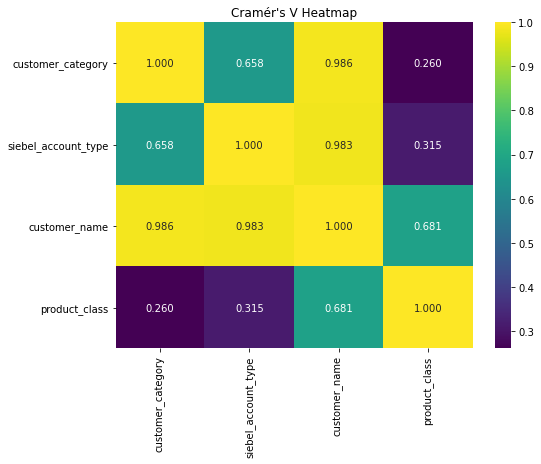

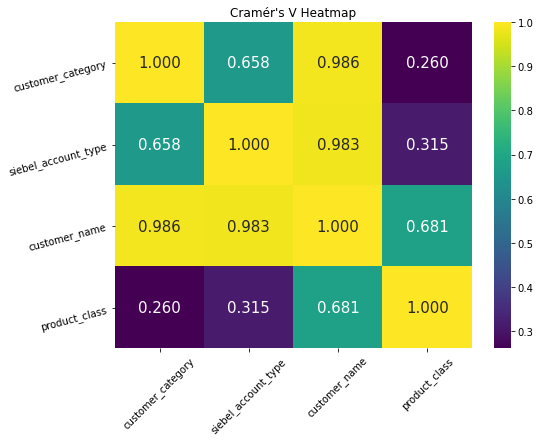

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt

# Your Cramér's V matrix
cramer_matrix = {
    'customer_category': [1, 0.657863, 0.985942, 0.260406],
    'siebel_account_type': [0.657863, 1, 0.982810, 0.314566],
    'customer_name': [0.985942, 0.982810, 1, 0.681153],
    'product_class': [0.260406, 0.314566, 0.681153, 1]
}

# Convert the matrix to a DataFrame
cramer_df = pd.DataFrame(cramer_matrix, index=cramer_matrix.keys())

# Create the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cramer_df, annot=True, cmap='viridis', fmt=".3f")
plt.title("Cramér's V Heatmap")
plt.show()

# # Create the heatmap with larger fonts and a rotation for column names
plt.figure(figsize=(8, 6))
sns.heatmap(cramer_df, annot=True, cmap='viridis', fmt=".3f", annot_kws={'size': 15})
plt.xticks(rotation=45)
plt.yticks(rotation=15)
plt.title("Cramér's V Heatmap")
plt.show()


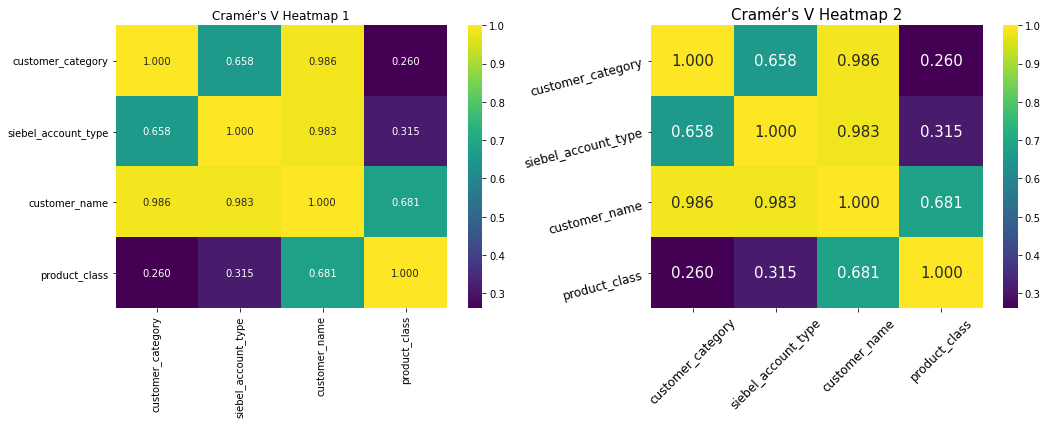

In [80]:
# Convert the matrix to a DataFrame
cramer_df = pd.DataFrame(cramer_matrix, index=cramer_matrix.keys())

# Create subplots with 1 row and 2 columns
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# Create the first heatmap
sns.heatmap(cramer_df, annot=True, cmap='viridis', fmt=".3f", ax=axs[0])
axs[0].set_title("Cramér's V Heatmap 1")

# Create the second heatmap
heatmap = sns.heatmap(cramer_df, annot=True, cmap='viridis', fmt=".3f", annot_kws={'size': 15}, ax=axs[1])
heatmap.set_xticklabels(heatmap.get_xticklabels(), fontsize=12, rotation=45)
heatmap.set_yticklabels(heatmap.get_yticklabels(), fontsize=12, rotation=15)
axs[1].set_title("Cramér's V Heatmap 2", fontsize=15)

plt.tight_layout()  # Adjusts subplot parameters to fit the figure area
plt.show()


In [90]:
# Filter data for markets outside the US
non_us_customers = df[df['country'] != 'US']

# Calculate total revenue for each customer in each period
revenue_period_1 = non_us_customers[non_us_customers['actual_first_shipped_quarter'] == '2022 Q 3'].groupby('customer_account_name')['revenue'].sum().reset_index()
revenue_period_2 = non_us_customers[non_us_customers['actual_first_shipped_quarter'] == '2023 Q 3'].groupby('customer_account_name')['revenue'].sum().reset_index()

# Merge the revenues for both periods based on the 'customer_account_name' column
merged_revenue = pd.merge(revenue_period_1, revenue_period_2, on='customer_account_name', suffixes=('_2022_Q_3', '_2023_Q_3'))

# Identify customers where revenue has increased
increasing_customers = merged_revenue['revenue_2023_Q_3'] > merged_revenue['revenue_2022_Q_3']

# Get the customers with revenue growth
customers_with_growth = merged_revenue[increasing_customers]

# Identify customers where revenue has decreased
decreasing_customers = merged_revenue['revenue_2023_Q_3'] < merged_revenue['revenue_2022_Q_3']

# Get the customers with revenue decline
customers_with_decline = merged_revenue[decreasing_customers]

# Display customers with revenue growth
print("Customers with Revenue Growth:")
print(customers_with_growth[['customer_account_name', 'revenue_2022_Q_3', 'revenue_2023_Q_3']])

# Display customers with revenue decline
print("\nCustomers with Revenue Decline:")
print(customers_with_decline[['customer_account_name', 'revenue_2022_Q_3', 'revenue_2023_Q_3']])


Customers with Revenue Growth:
                                 customer_account_name  revenue_2022_Q_3  \
1        *CIUSSS DE L'EST-DE-L'ILE-DE-MTL  -ST-ZOTIQUE               450   
2                           A.S.F.A. HOPITAL D'ENFANTS               433   
4                            ALBERTA HOSPITAL-EDMONTON              1046   
6                     ALLERGAN PHARMACEUTICALS IRELAND             66182   
7                           ALLIANCE BIOMEDICA PVT LTD              8239   
8                                         ALMEVAN S.L.            157504   
10                         ANDOVER ALIANZA MEDICA S.A.              2885   
11                                     ANS SABZWARI MD               781   
12                                    AP HOPITAL TENON               421   
15                             APP CHR SAMBRE ET MEUSE              2173   
16                     ARBOR MEDICAL KORPORACIJA EE OU               184   
19               ASKLEPIOS GROßHANDELSGESELLSCHAFT MBH   

In [91]:
# Filter data for markets outside the US
non_us_customers = df[df['country'] != 'US']

# Calculate total revenue for each customer in each period
revenue_period_1 = non_us_customers[non_us_customers['actual_first_shipped_quarter'] == '2022 Q 3'].groupby('customer_account_name')['revenue'].sum().reset_index()
revenue_period_2 = non_us_customers[non_us_customers['actual_first_shipped_quarter'] == '2023 Q 3'].groupby('customer_account_name')['revenue'].sum().reset_index()

# Merge the revenues for both periods based on the 'customer_account_name' column
merged_revenue = pd.merge(revenue_period_1, revenue_period_2, on='customer_account_name', suffixes=('_2022_Q_3', '_2023_Q_3'))

# Identify customers where revenue has increased
increasing_customers = merged_revenue['revenue_2023_Q_3'] > merged_revenue['revenue_2022_Q_3']

# Get the customers with revenue growth
customers_with_growth = merged_revenue[increasing_customers]

# Identify customers where revenue has decreased
decreasing_customers = merged_revenue['revenue_2023_Q_3'] < merged_revenue['revenue_2022_Q_3']

# Get the customers with revenue decline
customers_with_decline = merged_revenue[decreasing_customers]

# Display customers with revenue growth
print("Customers with Revenue Growth:")
print(customers_with_growth[['customer_account_name', 'revenue_2022_Q_3', 'revenue_2023_Q_3']])

# Display customers with revenue decline
print("\nCustomers with Revenue Decline:")
print(customers_with_decline[['customer_account_name', 'revenue_2022_Q_3', 'revenue_2023_Q_3']])


Customers with Revenue Growth:
                                 customer_account_name  revenue_2022_Q_3  \
1        *CIUSSS DE L'EST-DE-L'ILE-DE-MTL  -ST-ZOTIQUE               450   
2                           A.S.F.A. HOPITAL D'ENFANTS               433   
4                            ALBERTA HOSPITAL-EDMONTON              1046   
6                     ALLERGAN PHARMACEUTICALS IRELAND             66182   
7                           ALLIANCE BIOMEDICA PVT LTD              8239   
8                                         ALMEVAN S.L.            157504   
10                         ANDOVER ALIANZA MEDICA S.A.              2885   
11                                     ANS SABZWARI MD               781   
12                                    AP HOPITAL TENON               421   
15                             APP CHR SAMBRE ET MEUSE              2173   
16                     ARBOR MEDICAL KORPORACIJA EE OU               184   
19               ASKLEPIOS GROßHANDELSGESELLSCHAFT MBH   

In [92]:
# Filter data for markets outside the US
non_us_customers = df[df['country'] != 'US']

# Calculate total revenue for each customer in each period
revenue_period_1 = non_us_customers[non_us_customers['actual_first_shipped_quarter'] == '2022 Q 3'].groupby('customer_account_name')['revenue'].sum().reset_index()
revenue_period_2 = non_us_customers[non_us_customers['actual_first_shipped_quarter'] == '2023 Q 3'].groupby('customer_account_name')['revenue'].sum().reset_index()

# Merge the revenues for both periods based on the 'customer_account_name' column
merged_revenue = pd.merge(revenue_period_1, revenue_period_2, on='customer_account_name', suffixes=('_2022_Q_3', '_2023_Q_3'))

# Identify customers where revenue has increased
increasing_customers = merged_revenue['revenue_2023_Q_3'] > merged_revenue['revenue_2022_Q_3']

# Get the customers with revenue growth
customers_with_growth = merged_revenue[increasing_customers]

# Identify customers where revenue has decreased
decreasing_customers = merged_revenue['revenue_2023_Q_3'] < merged_revenue['revenue_2022_Q_3']

# Get the customers with revenue decline
customers_with_decline = merged_revenue[decreasing_customers]

# Display top twenty customers with revenue growth
print("Top Twenty Customers with Revenue Growth:")
print(customers_with_growth[['customer_account_name', 'revenue_2022_Q_3', 'revenue_2023_Q_3']].head(20))

# Display top twenty customers with revenue decline
print("\nTop Twenty Customers with Revenue Decline:")
print(customers_with_decline[['customer_account_name', 'revenue_2022_Q_3', 'revenue_2023_Q_3']].head(20))


Top Twenty Customers with Revenue Growth:
                            customer_account_name  revenue_2022_Q_3  \
1   *CIUSSS DE L'EST-DE-L'ILE-DE-MTL  -ST-ZOTIQUE               450   
2                      A.S.F.A. HOPITAL D'ENFANTS               433   
4                       ALBERTA HOSPITAL-EDMONTON              1046   
6                ALLERGAN PHARMACEUTICALS IRELAND             66182   
7                      ALLIANCE BIOMEDICA PVT LTD              8239   
8                                    ALMEVAN S.L.            157504   
10                    ANDOVER ALIANZA MEDICA S.A.              2885   
11                                ANS SABZWARI MD               781   
12                               AP HOPITAL TENON               421   
15                        APP CHR SAMBRE ET MEUSE              2173   
16                ARBOR MEDICAL KORPORACIJA EE OU               184   
19          ASKLEPIOS GROßHANDELSGESELLSCHAFT MBH              1514   
21                                 

In [93]:
# Filter data for markets outside the US
non_us_customers = df[df['country'] != 'US']

# Calculate total revenue for each customer in each period
revenue_period_1 = non_us_customers[non_us_customers['actual_first_shipped_quarter'] == '2022 Q 3'].groupby('customer_account_name')['revenue'].sum().reset_index()
revenue_period_2 = non_us_customers[non_us_customers['actual_first_shipped_quarter'] == '2023 Q 3'].groupby('customer_account_name')['revenue'].sum().reset_index()

# Merge the revenues for both periods based on the 'customer_account_name' column
merged_revenue = pd.merge(revenue_period_1, revenue_period_2, on='customer_account_name', suffixes=('_2022_Q_3', '_2023_Q_3'))

# Identify customers where revenue has increased
increasing_customers = merged_revenue['revenue_2023_Q_3'] > merged_revenue['revenue_2022_Q_3']

# Get the customers with revenue growth
customers_with_growth = merged_revenue[increasing_customers]

# Identify customers where revenue has decreased
decreasing_customers = merged_revenue['revenue_2023_Q_3'] < merged_revenue['revenue_2022_Q_3']

# Get the customers with revenue decline
customers_with_decline = merged_revenue[decreasing_customers]

# Reset index to create a count column starting from 1 for both dataframes
customers_with_growth.reset_index(drop=True, inplace=True)
customers_with_growth.index += 1

customers_with_decline.reset_index(drop=True, inplace=True)
customers_with_decline.index += 1

# Display top twenty customers with revenue growth
print("Top Twenty Customers with Revenue Growth:")
print(customers_with_growth[['customer_account_name', 'revenue_2022_Q_3', 'revenue_2023_Q_3']].head(20))

# Display top twenty customers with revenue decline
print("\nTop Twenty Customers with Revenue Decline:")
print(customers_with_decline[['customer_account_name', 'revenue_2022_Q_3', 'revenue_2023_Q_3']].head(20))


Top Twenty Customers with Revenue Growth:
                            customer_account_name  revenue_2022_Q_3  \
1   *CIUSSS DE L'EST-DE-L'ILE-DE-MTL  -ST-ZOTIQUE               450   
2                      A.S.F.A. HOPITAL D'ENFANTS               433   
3                       ALBERTA HOSPITAL-EDMONTON              1046   
4                ALLERGAN PHARMACEUTICALS IRELAND             66182   
5                      ALLIANCE BIOMEDICA PVT LTD              8239   
6                                    ALMEVAN S.L.            157504   
7                     ANDOVER ALIANZA MEDICA S.A.              2885   
8                                 ANS SABZWARI MD               781   
9                                AP HOPITAL TENON               421   
10                        APP CHR SAMBRE ET MEUSE              2173   
11                ARBOR MEDICAL KORPORACIJA EE OU               184   
12          ASKLEPIOS GROßHANDELSGESELLSCHAFT MBH              1514   
13                                 

In [96]:
# Filter data for markets outside the US
non_us_customers = df[df['country'] != 'US']

# Calculate total revenue for each customer in each period
revenue_period_1 = non_us_customers[non_us_customers['actual_first_shipped_quarter'] == '2022 Q 3'].groupby('customer_number')['revenue'].sum().reset_index()
revenue_period_2 = non_us_customers[non_us_customers['actual_first_shipped_quarter'] == '2023 Q 3'].groupby('customer_number')['revenue'].sum().reset_index()

# Merge the revenues for both periods based on the 'customer_account_name' column
merged_revenue = pd.merge(revenue_period_1, revenue_period_2, on='customer_number', suffixes=('_2022_Q_3', '_2023_Q_3'))

# Identify customers where revenue has increased
increasing_customers = merged_revenue['revenue_2023_Q_3'] > merged_revenue['revenue_2022_Q_3']

# Get the customers with revenue growth
customers_with_growth = merged_revenue[increasing_customers]

# Identify customers where revenue has decreased
decreasing_customers = merged_revenue['revenue_2023_Q_3'] < merged_revenue['revenue_2022_Q_3']

# Get the customers with revenue decline
customers_with_decline = merged_revenue[decreasing_customers]

# Reset index to create a count column starting from 1 for both dataframes
customers_with_growth.reset_index(drop=True, inplace=True)
customers_with_growth.index += 1

customers_with_decline.reset_index(drop=True, inplace=True)
customers_with_decline.index += 1

# Display top twenty customers with revenue growth
print("Top Twenty Customers with Revenue Growth:")
print(customers_with_growth[['customer_number', 'revenue_2022_Q_3', 'revenue_2023_Q_3']].head(20))

# Display top twenty customers with revenue decline
print("\nTop Twenty Customers with Revenue Decline:")
print(customers_with_decline[['customer_number', 'revenue_2022_Q_3', 'revenue_2023_Q_3']].head(20))


Top Twenty Customers with Revenue Growth:
    customer_number  revenue_2022_Q_3  revenue_2023_Q_3
1              7298              1550              4448
2             26560               977              5398
3             46943               451              2261
4             49303             13113             15891
5             50795               487               785
6             58413              1189              2554
7             64824              1455              2687
8             66655             12163             54675
9             68060               737              2493
10            70740               280              5055
11            75113             57264             82753
12            80865              3357             62722
13            94767            183666            192782
14            97533             18090             21124
15           110751              1155              1532
16           114806               611              1234
17    

In [98]:
# Filter data for markets outside the US
non_us_customers = df[df['country'] != 'US']

# Calculate total revenue for each customer in each period
revenue_period_1 = non_us_customers[non_us_customers['actual_first_shipped_quarter'] == '2022 Q 3'].groupby('customer_number')['revenue'].sum().reset_index()
revenue_period_2 = non_us_customers[non_us_customers['actual_first_shipped_quarter'] == '2023 Q 3'].groupby('customer_number')['revenue'].sum().reset_index()

# Merge the revenues for both periods based on the 'customer_account_name' column
merged_revenue = pd.merge(revenue_period_1, revenue_period_2, on='customer_number', suffixes=('_2022_Q_3', '_2023_Q_3'))

# Add a new column 'customer_nickname' by taking the first few characters of the customer names
merged_revenue['customer_nickname'] = merged_revenue['customer_name'].apply(lambda x: 'C' + x[:4] if len(x) >= 4 else 'C' + x)  # Take the first 4 characters and prepend 'C'

# Identify customers where revenue has increased
increasing_customers = merged_revenue['revenue_2023_Q_3'] > merged_revenue['revenue_2022_Q_3']

# Get the customers with revenue growth
customers_with_growth = merged_revenue[increasing_customers]

# Identify customers where revenue has decreased
decreasing_customers = merged_revenue['revenue_2023_Q_3'] < merged_revenue['revenue_2022_Q_3']

# Get the customers with revenue decline
customers_with_decline = merged_revenue[decreasing_customers]

# Reset index to create a count column starting from 1 for both dataframes
customers_with_growth.reset_index(drop=True, inplace=True)
customers_with_growth.index += 1

customers_with_decline.reset_index(drop=True, inplace=True)
customers_with_decline.index += 1

# Display top twenty customers with revenue growth
print("Top Twenty Customers with Revenue Growth:")
print(customers_with_growth[['customer_number', 'customer_nickname', 'revenue_2022_Q_3', 'revenue_2023_Q_3']].head(20))

# Display top twenty customers with revenue decline
print("\nTop Twenty Customers with Revenue Decline:")
print(customers_with_decline[['customer_number', 'customer_nickname', 'revenue_2022_Q_3', 'revenue_2023_Q_3']].head(20))


Top Twenty Customers with Revenue Growth:
    customer_number customer_nickname  revenue_2022_Q_3  revenue_2023_Q_3
1              7298             C7298              1550              4448
2             26560             C2656               977              5398
3             46943             C4694               451              2261
4             49303             C4930             13113             15891
5             50795             C5079               487               785
6             58413             C5841              1189              2554
7             64824             C6482              1455              2687
8             66655             C6665             12163             54675
9             68060             C6806               737              2493
10            70740             C7074               280              5055
11            75113             C7511             57264             82753
12            80865             C8086              3357             62

In [103]:
# Filter data for markets outside the US
non_us_customers = df[df['country'] != 'US']

# Calculate total revenue for each customer in each period
revenue_period_1 = non_us_customers[non_us_customers['actual_first_shipped_quarter'] == '2022 Q 3'].groupby('customer_account_name')['revenue'].sum().reset_index()
revenue_period_2 = non_us_customers[non_us_customers['actual_first_shipped_quarter'] == '2023 Q 3'].groupby('customer_account_name')['revenue'].sum().reset_index()

# Merge the revenues for both periods based on the 'customer_account_name' column
merged_revenue = pd.merge(revenue_period_1, revenue_period_2, on='customer_account_name', suffixes=('_2022_Q_3', '_2023_Q_3'))

# Add a new column 'customer_nickname' by taking the first few characters of the customer names
merged_revenue['customer_nickname'] = merged_revenue['customer_account_name'].apply(lambda x: x[:4] if len(x) >= 4 else x)  # Take the first 4 characters

# Replace 'customer_account_name' column with 'customer_nickname'
merged_revenue.drop(columns='customer_account_name', inplace=True)
merged_revenue.rename(columns={'customer_nickname': 'customer_account_name'}, inplace=True)

# Identify customers where revenue has increased
increasing_customers = merged_revenue['revenue_2023_Q_3'] > merged_revenue['revenue_2022_Q_3']

# Get the customers with revenue growth
customers_with_growth = merged_revenue[increasing_customers]

# Identify customers where revenue has decreased
decreasing_customers = merged_revenue['revenue_2023_Q_3'] < merged_revenue['revenue_2022_Q_3']

# Get the customers with revenue decline
customers_with_decline = merged_revenue[decreasing_customers]

# Reset index to create a count column starting from 1 for both dataframes
customers_with_growth.reset_index(drop=True, inplace=True)
customers_with_growth.index += 1

customers_with_decline.reset_index(drop=True, inplace=True)
customers_with_decline.index += 1

# Display top twenty customers with revenue growth
print("Top Twenty Customers with Revenue Growth:")
print(customers_with_growth[['customer_account_name', 'revenue_2022_Q_3', 'revenue_2023_Q_3']].head(20))

# Display top twenty customers with revenue decline
print("\nTop Twenty Customers with Revenue Decline:")
print(customers_with_decline[['customer_account_name', 'revenue_2022_Q_3', 'revenue_2023_Q_3']].head(20))



Top Twenty Customers with Revenue Growth:
   customer_account_name  revenue_2022_Q_3  revenue_2023_Q_3
1                   *CIU               450               979
2                   A.S.               433              2947
3                   ALBE              1046              2290
4                   ALLE             66182            188415
5                   ALLI              8239             12667
6                   ALME            157504            197416
7                   ANDO              2885             28676
8                   ANS                781              1806
9                   AP H               421              1480
10                  APP               2173              2225
11                  ARBO               184              7928
12                  ASKL              1514              1527
13                  AZ M              2787              3256
14                  BDH-               829              1177
15                  BEZI               297 

In [106]:
# Filter data for markets outside the US and specific quarters
non_us_customers = df[(df['country'] != 'US') & (df['actual_first_shipped_quarter'].isin(['2022 Q 3', '2023 Q 3']))]

# Group revenue by customer and period
revenue_by_customer_period = non_us_customers.groupby(['customer_account_name', 'actual_first_shipped_quarter'])['revenue'].sum().unstack()

# Calculate revenue growth or decline
revenue_by_customer_period['growth'] = revenue_by_customer_period['2023 Q 3'] - revenue_by_customer_period['2022 Q 3']

# Get top twenty customers with revenue growth
top_growth_customers = revenue_by_customer_period.sort_values('growth', ascending=False).head(20)
pd.options.display.float_format = '{:.2f}'.format

# Get top twenty customers with revenue decline
top_decline_customers = revenue_by_customer_period.sort_values('growth').head(20)

# Display top twenty customers with revenue growth
print("Top Twenty International Accounts showing Revenue Growth:")
print(top_growth_customers)

# Display top twenty customers with revenue decline
print("\nTop Twenty International Accounts showing Revenue Decline:")
print(top_decline_customers)


Top Twenty International Accounts showing Revenue Growth:
actual_first_shipped_quarter                   2022 Q 3  2023 Q 3    growth
customer_account_name                                                      
ALLERGAN PHARMACEUTICALS IRELAND               66181.89 188414.82 122232.93
DUOMED THE NETHERLANDS                          3356.82  62722.47  59365.65
NEUROSWISS AG                                  56935.40 114284.46  57349.06
NEUROLITE AG                                   12163.50  54675.13  42511.63
ALMEVAN S.L.                                  157504.34 197415.85  39911.51
VITALMEDIC SA                                   5272.50  45101.80  39829.30
INSTRUMENTOS MEDICOS INTERNACIONALES SA DE CV  38790.50  74115.20  35324.70
ANDOVER ALIANZA MEDICA S.A.                     2884.69  28676.24  25791.55
OPTIMA MEDICAL LTD                             57264.40  82753.27  25488.87
GVB-GELIMED GMBH                               39885.69  64851.22  24965.53
COMED S.C.                    